In [1]:
import matplotlib.pyplot as plt

In [1]:
from backend.app.database import DatabaseConnection

Database connection established successfully


In [2]:
db_connection=DatabaseConnection()

Database connection established successfully


In [5]:
qa_data = db_connection.get_qa_plot_data("dark")

[QAData(qa_id=UUID('ac4d561d-da3a-4df7-9221-02687a56207d'), imagetyp='masterframe', pipeline_id_id=65341, qa_type='dark', created_at=datetime.datetime(2025, 10, 21, 14, 42, 17, 166696, tzinfo=zoneinfo.ZoneInfo(key='Asia/Seoul')), updated_at=datetime.datetime(2025, 10, 21, 14, 42, 17, 166696, tzinfo=zoneinfo.ZoneInfo(key='Asia/Seoul')), clipmed=0.0, clipstd=2.0571603775024414, clipmin=-6.0, clipmax=6.0, nhotpix=157860, ntotpix=61171488, uniform=-2.1054634097442144, sigmean=None, edgevar=None, trimmed=None, filter='m750', seeing=None, ellipticity=None, rotang1=None, astrometric_offset=None, skyval=None, skysig=None, zp_auto=None, ezp_auto=None, ul5_5=None, stdnumb=None, exptime=8.0, unmatch=None, rsep_rms=None, rsep_q2=None, rsep_p95=None, awincrmn=None, ellipmn=None, pa_align=None, filename='dark_8s_7DT05_20250215_1x1_gain0_C31116.fits', sanity=False, id=416723), QAData(qa_id=UUID('099e4f51-cf4e-4f0e-ac4d-f92138290c41'), imagetyp='masterframe', pipeline_id_id=65331, qa_type='dark', crea

In [7]:
for q in qa_data:
    print(q)

{'qa_id': UUID('ac4d561d-da3a-4df7-9221-02687a56207d'), 'imagetyp': 'masterframe', 'pipeline_id_id': 65341, 'qa_type': 'dark', 'created_at': datetime.datetime(2025, 10, 21, 14, 42, 17, 166696, tzinfo=zoneinfo.ZoneInfo(key='Asia/Seoul')), 'updated_at': datetime.datetime(2025, 10, 21, 14, 42, 17, 166696, tzinfo=zoneinfo.ZoneInfo(key='Asia/Seoul')), 'clipmed': 0.0, 'clipstd': 2.0571603775024414, 'clipmin': -6.0, 'clipmax': 6.0, 'nhotpix': 157860, 'ntotpix': 61171488, 'uniform': -2.1054634097442144, 'filter': 'm750', 'exptime': 8.0, 'filename': 'dark_8s_7DT05_20250215_1x1_gain0_C31116.fits', 'sanity': False}
{'qa_id': UUID('099e4f51-cf4e-4f0e-ac4d-f92138290c41'), 'imagetyp': 'masterframe', 'pipeline_id_id': 65331, 'qa_type': 'dark', 'created_at': datetime.datetime(2025, 10, 21, 14, 42, 4, 775371, tzinfo=zoneinfo.ZoneInfo(key='Asia/Seoul')), 'updated_at': datetime.datetime(2025, 10, 21, 14, 42, 4, 775371, tzinfo=zoneinfo.ZoneInfo(key='Asia/Seoul')), 'clipmed': 0.0, 'clipstd': 2.066330909729

In [1]:
from backend.app.monitor import update_masterframe_data

In [2]:
update_masterframe_data(dtype=["dark"])

In [2]:
update_masterframe_data(dtype=["flat"])

In [112]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def plot_par(data, par, tel="7DT05", filt=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8))

    # Convert DATE-OBS to datetime if not already
    data['DATE-OBS'] = pd.to_datetime(data['DATE-OBS'])

    data = data[data['TELESCOP'] == tel]
    #data = data[data[par]!=0]
    if filt is not None:
        subdata = data[data['FILTER'] == filt]
        new_data = np.array(subdata[par][1:])/np.array(subdata[par][:-1])
        ax1.plot(subdata['DATE-OBS'][1:], new_data, label=filt, marker="o")
    else:
        for filt in data['FILTER'].unique():
            subdata = data[data['FILTER'] == filt]
            new_data = np.array(subdata[par][1:])/np.array(subdata[par][:-1])
            
            ax1.plot(subdata['DATE-OBS'][1:], new_data, label=filt, marker="o")
    
    ax1.set_xlabel('Date')
    ax1.set_ylabel(par)
    #ax1.set_yscale("log")
    ax1.set_title(f'{par} vs Date')
    ax1.tick_params(axis='x', rotation=45)
    ax1.legend()

    #data = data[data['TELESCOP'] == tel]
    #data = data[data[par]!=0]
    if filt is not None:
        subdata = data[data['FILTER'] == filt]
        ax2.plot(subdata['DATE-OBS'], subdata[par], label=filt, marker="o")
    else:   
        for filt in data['FILTER'].unique():
            subdata = data[data['FILTER'] == filt]
            ax2.plot(subdata['DATE-OBS'], subdata[par], label=filt, marker="o")
    ax2.set_xlabel('Date')
    ax2.set_ylabel(par)
    #ax1.set_yscale("log")
    ax2.set_title(f'{par} vs Date')
    ax2.tick_params(axis='x', rotation=45)
    ax2.legend()


    ax3.hist(data[par], bins=50, alpha=0.7, edgecolor='black')
    ax3.set_xlabel(par)
    ax3.set_ylabel('Frequency')
    ax3.set_title(f'Distribution of {par} Values')
    ax3.axvline(np.percentile(data[par], 90), color='red', linestyle='--', label='Threshold (90th percentile)')
    ax3.legend()

    plt.tight_layout()
    plt.show()

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [26]:
row

unit                          7DT16
files_processed                  16
shape                  (6388, 9576)
always_bad_count             140096
always_bad_fraction         0.00229
final_bad_pixels             416514
final_bad_fraction         0.006809
Name: 15, dtype: object

In [30]:
newd = pd.read_csv("/tmp/always_bad_summary.csv")
print("UNIT", "DEAD", "DEAD_FRACTION", "DEAD_RATIO")
for index, row in newd.iterrows():
    print(row["unit"], row["always_bad_count"],f"{row['always_bad_fraction']*100:.1f}", f"{row['always_bad_count']/row['final_bad_pixels']*100:.1f}")












UNIT DEAD DEAD_FRACTION DEAD_RATIO
7DT01 147428 0.2 40.2
7DT02 133210 0.2 35.8
7DT03 133453 0.2 35.9
7DT04 132803 0.2 32.9
7DT05 145449 0.2 35.5
7DT06 137739 0.2 33.7
7DT07 130969 0.2 35.0
7DT08 131089 0.2 33.9
7DT09 141963 0.2 36.6
7DT10 128560 0.2 35.1
7DT11 132942 0.2 38.7
7DT12 133466 0.2 33.8
7DT13 135225 0.2 37.5
7DT14 144260 0.2 44.4
7DT15 154821 0.3 36.7
7DT16 140096 0.2 33.6


In [21]:
newd = pd.read_csv("/tmp/always_bad_summary.csv")
print("Columns in CSV:", list(newd.columns))
print("\nData preview:")
print(newd.head())

print("\n=== Always Bad Pixel Analysis ===")
for index, row in newd.iterrows():
    unit = row["unit"]
    always_bad_fraction = row["always_bad_fraction"] * 100
    always_bad_ratio = (row["always_bad_count"] / row["final_bad_pixels"]) * 100
    print(f"{unit}: {always_bad_fraction:.3f}% of total pixels, {always_bad_ratio:.1f}% of bad pixels are always bad")

Columns in CSV: ['unit', 'files_processed', 'shape', 'always_bad_count', 'always_bad_fraction', 'final_bad_pixels', 'final_bad_fraction']

Data preview:
    unit  files_processed         shape  always_bad_count  \
0  7DT01               19  (6388, 9576)            147428   
1  7DT02               13  (6388, 9576)            133210   
2  7DT03               13  (6388, 9576)            133453   
3  7DT04               13  (6388, 9576)            132803   
4  7DT05               15  (6388, 9576)            145449   

   always_bad_fraction  final_bad_pixels  final_bad_fraction  
0             0.002410            366565            0.005992  
1             0.002178            372399            0.006088  
2             0.002182            371561            0.006074  
3             0.002171            403535            0.006597  
4             0.002378            409444            0.006693  

=== Always Bad Pixel Analysis ===
7DT01: 0.241% of total pixels, 40.2% of bad pixels are always bad
7

In [ ]:
data = pd.read_csv(f'/tmp/pipeline/dark.ecsv', sep=' ', comment='#')
data['DATE-OBS'] = pd.to_datetime(data['DATE-OBS'])
subdata = data[data["UNIFORM"] < -2.15]

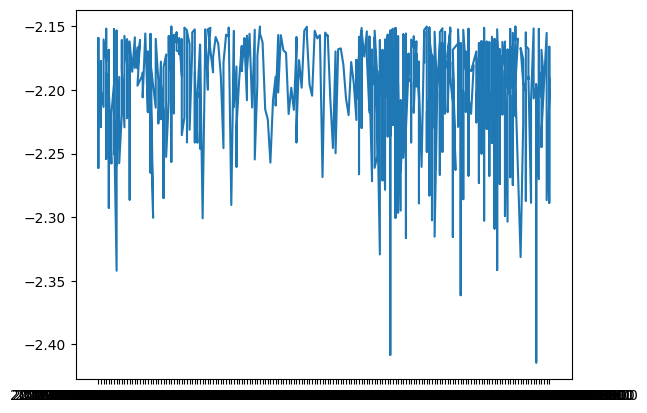

In [9]:
plt.plot(subdata["DATE-LOC"], subdata["UNIFORM"])

In [ ]:
data[""]

In [5]:
data['DATE-OBS'] = pd.to_datetime(data['DATE-OBS'])


In [6]:
data

,DATE-OBS,TELESCOP,IMAGETYP,FILTER,CLIPMEAN,CLIPMED,CLIPSTD,CLIPMIN,CLIPMAX,DATE-LOC,NDELTA,NHOTPIX,CCD-TEMP,AMBTEMP,SKYTEMP,UNIFORM
0,2024-06-06,7DT09,DARK,m775,0.015573,0.0,2.439486,-7.0,7.0,2024-06-10 00:55:07.000,-0.3695,385946,-10.0,NaN,NaN,-2.203429
1,2024-06-06,7DT05,DARK,m575,0.037668,0.0,2.375280,-7.0,7.0,2024-06-10 00:55:07.000,-0.3145,368671,-9.9,NaN,NaN,-2.255863
2,2024-06-06,7DT03,DARK,m525,0.082513,0.0,2.504143,-7.0,7.0,2024-06-10 00:55:07.000,-0.8085,420643,-9.9,NaN,NaN,-2.159032
3,2024-06-06,7DT08,DARK,m725,0.022907,0.0,2.389754,-7.0,7.0,2024-06-10 00:55:07.000,-2.9490,383800,-9.9,NaN,NaN,-2.261245
4,2024-06-06,7DT07,DARK,m650,0.000976,0.0,2.443116,-7.0,7.0,2024-06-10 00:55:07.000,-0.4909,373442,-9.9,NaN,NaN,-2.114075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573,2025-07-28,7DT06,DARK,m750,0.051897,0.0,2.494854,-7.0,7.0,2025-07-29 08:36:02.000,-0.8784,409833,-10.1,19.6,-15.0,-2.211444
2574,2025-07-28,7DT12,DARK,m875,0.043704,0.0,2.472641,-7.0,7.0,2025-07-29 08:36:02.000,-0.8815,395357,-9.9,19.6,-15.0,-2.165952
2575,2025-07-28,7DT10,DARK,m825,0.253471,0.0,2.506493,-7.0,7.0,2025-07-29 08:36:02.000,-0.8089,367028,-10.1,19.6,-15.0,-2.116945
2576,2025-07-28,7DT14,DARK,m775,0.045665,0.0,2.278982,-6.0,6.0,2025-07-29 08:36:02.000,-0.2567,325225,-10.0,19.6,-15.0,-2.288741


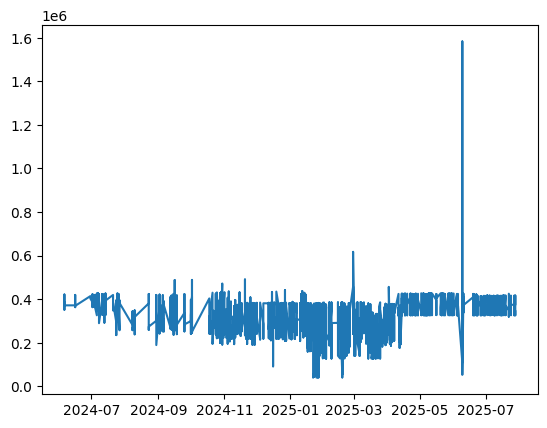

In [7]:
plt.plot(data['DATE-OBS'], data['NHOTPIX'])

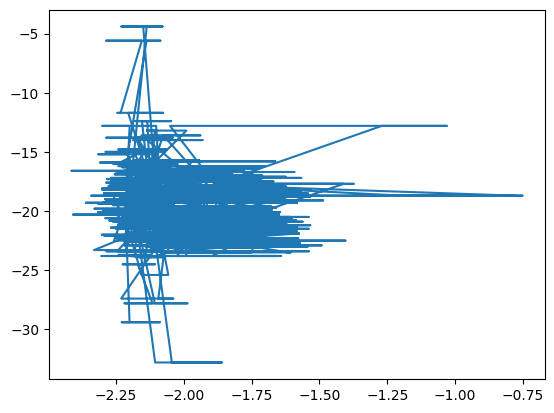

In [10]:
plt.plot(data["UNIFORM"], data["SKYTEMP"])

In [18]:
max(data["CLIPSTD"])

2.424882650375366

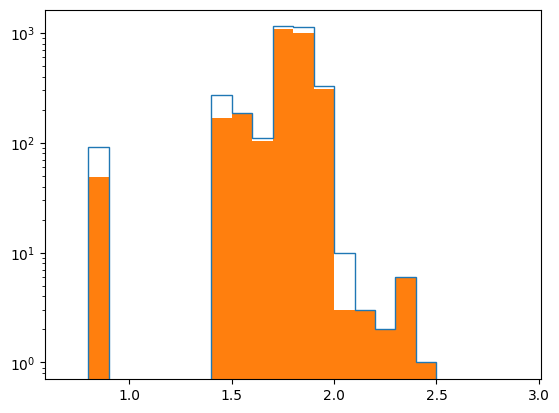

In [17]:
plt.hist(data["CLIPSTD"], histtype="step", bins=np.arange(0.7, 3.0, 0.1))
plt.hist(data[data["CLIPMED"] == 513]["CLIPSTD"], bins=np.arange(0.7, 3.0, 0.1))
plt.yscale("log")



In [31]:
10**0.3

1.9952623149688795

In [ ]:

CLIPMAX > 1.3 or
CLIPMIN < 0.7 or
EDGEVAR > 0.7 or
SIGMEAN > 0.5 or
CUTTED = True


In [81]:
len(data)

13614

In [80]:
data[(data["CUTTED"]==True) + (data["EDGEVAR"]>0.7) + (data["CLIPMAX"]>1.3) + (data["CLIPMIN"]<0.7) + (data["SIGMEAN"]>0.5)]

,DATE-OBS,TELESCOP,IMAGETYP,FILTER,CLIPMEAN,CLIPMED,CLIPSTD,CLIPMIN,CLIPMAX,SIGMEAN,SIGMED,SIGSTD,REFRMS,CUTTED,EDGEVAR
446,2024-09-02T00:00:00.000,7DT10,FLAT,g,0.996356,1.004296,0.049547,0.841815,1.107976,0.056776,0.047004,0.038290,0.057280,False,0.943558
1091,2024-09-20T00:00:00.000,7DT10,FLAT,m800,0.945756,1.000244,0.376330,0.179506,2.029392,0.022529,0.022781,0.007287,0.394675,False,5.988418
1092,2024-09-20T00:00:00.000,7DT07,FLAT,i,0.983927,1.008733,0.075805,0.728784,1.223910,0.016914,0.015730,0.006120,0.107419,False,0.723813
2432,2024-11-07T00:00:00.000,7DT14,FLAT,i,0.834158,1.000004,0.637233,-0.041598,2.212736,0.009264,0.009687,0.005804,0.663060,False,366.444730
2433,2024-11-07T00:00:00.000,7DT14,FLAT,m625,0.996259,1.007069,0.049209,0.844754,1.094710,0.011982,0.011853,0.003111,0.094379,False,1.509504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8299,2025-03-03T00:00:00.000,7DT10,FLAT,m600,0.991609,1.001643,0.051090,0.838166,1.143654,0.007070,0.006999,0.001773,0.064499,True,0.120113
8300,2025-03-03T00:00:00.000,7DT10,FLAT,z,0.991974,1.000905,0.053858,0.830221,1.152093,0.008434,0.008231,0.002421,0.060552,True,0.021752
8301,2025-03-03T00:00:00.000,7DT10,FLAT,i,0.992106,1.000963,0.047770,0.848329,1.135687,0.007083,0.007011,0.001775,0.059520,True,0.016734
8302,2025-03-03T00:00:00.000,7DT10,FLAT,m800,0.994765,1.001536,0.049365,0.846617,1.142585,0.007057,0.006984,0.001774,0.063318,True,0.086688


In [78]:
data[np.log10(data["EDGEVAR"])>np.log10(0.5)].sort_values(by="EDGEVAR")

,DATE-OBS,TELESCOP,IMAGETYP,FILTER,CLIPMEAN,CLIPMED,CLIPSTD,CLIPMIN,CLIPMAX,SIGMEAN,SIGMED,SIGSTD,REFRMS,CUTTED,EDGEVAR
422,2024-08-31T00:00:00.000,7DT11,FLAT,m400,0.992601,1.002231,0.047491,0.849173,1.094157,0.006017,0.005954,0.001519,0.006634,False,0.579703
441,2024-09-02T00:00:00.000,7DT11,FLAT,m400,0.993286,1.002706,0.047510,0.849692,1.096254,0.010734,0.010622,0.002710,0.008207,False,0.583995
914,2024-09-15T00:00:00.000,7DT11,FLAT,m400,0.993047,1.002810,0.048391,0.847054,1.130620,0.012346,0.012218,0.003116,0.007767,False,0.586717
295,2024-08-23T00:00:00.000,7DT11,FLAT,m400,0.992919,1.002594,0.048185,0.847497,1.130686,0.010540,0.010430,0.002662,0.007231,False,0.587532
998,2024-09-16T00:00:00.000,7DT11,FLAT,m400,0.993091,1.002826,0.048321,0.847285,1.133230,0.012344,0.012216,0.003117,0.007744,False,0.590423
799,2024-09-13T00:00:00.000,7DT11,FLAT,m400,0.993090,1.002831,0.048328,0.847258,1.135836,0.012329,0.012200,0.003113,0.007731,False,0.592106
28,2024-08-08T00:00:00.000,7DT11,FLAT,m400,0.993251,1.002943,0.048298,0.847512,1.138469,0.012954,0.012818,0.003271,0.000000,False,0.594565
737,2024-09-12T00:00:00.000,7DT11,FLAT,m400,0.993128,1.002835,0.048303,0.847376,1.136653,0.012332,0.012204,0.003114,0.007727,False,0.596753
87,2024-08-10T00:00:00.000,7DT11,FLAT,m400,0.993441,1.003000,0.048077,0.848233,1.121693,0.013097,0.012961,0.003307,0.008428,False,0.597209
361,2024-08-30T00:00:00.000,7DT11,FLAT,m400,0.992924,1.002627,0.048175,0.847519,1.131777,0.010552,0.010442,0.002665,0.007228,False,0.597866


In [ ]:
0.3

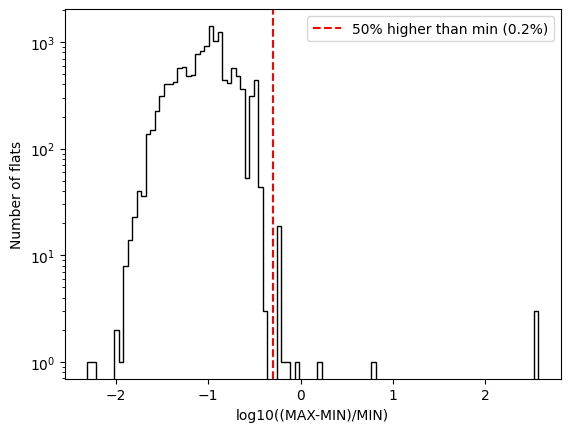

In [63]:
plt.hist(np.log10(data["EDGEVAR"]), bins=100, histtype="step", color="k")
plt.yscale("log")
plt.xlabel("log10((MAX-MIN)/MIN)")
plt.ylabel("Number of flats")
plt.axvline(np.log10(1/2), color="r", linestyle="--", label="50% higher than min (0.2%)")
plt.legend()
plt.show()

In [18]:
len(data[data["CUTTED"]]["DATE-OBS"].unique())

18

In [21]:
data[data["DATE-OBS"]== "2025-02-22T00:00:00.000"]

,DATE-OBS,TELESCOP,IMAGETYP,FILTER,CLIPMEAN,CLIPMED,CLIPSTD,CLIPMIN,CLIPMAX,SIGMEAN,SIGMED,SIGSTD,REFRMS,sanity_check,violations
7575,2025-02-22T00:00:00.000,7DT05,FLAT,m750,0.990475,1.002895,0.050223,0.838734,1.122719,0.023183,0.020603,0.008684,0.026445,True,NaN
7576,2025-02-22T00:00:00.000,7DT05,FLAT,g,0.990632,1.001238,0.052649,0.832359,1.119502,0.006948,0.006876,0.001747,0.010863,True,NaN
7577,2025-02-22T00:00:00.000,7DT05,FLAT,r,0.990164,1.001325,0.053817,0.828413,1.140568,0.007107,0.007034,0.001786,0.010696,True,NaN
7578,2025-02-22T00:00:00.000,7DT05,FLAT,m475,0.989918,1.001848,0.048527,0.843735,1.111905,0.007347,0.007271,0.001849,0.013843,True,NaN
7579,2025-02-22T00:00:00.000,7DT05,FLAT,m575,0.990213,1.001869,0.050204,0.838380,1.131570,0.009628,0.009519,0.002439,0.019173,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7646,2025-02-22T00:00:00.000,7DT11,FLAT,m400,0.990558,1.001853,0.054706,0.825864,1.129098,0.007036,0.006963,0.001773,0.040549,True,NaN
7647,2025-02-22T00:00:00.000,7DT11,FLAT,m625,0.989604,1.001650,0.058732,0.813122,1.094804,0.008446,0.008368,0.002114,0.025505,True,NaN
7648,2025-02-22T00:00:00.000,7DT11,FLAT,g,0.989178,1.001330,0.056519,0.819022,1.109359,0.006901,0.006829,0.001737,0.010888,True,NaN
7649,2025-02-22T00:00:00.000,7DT11,FLAT,m850,0.995973,1.006003,0.103032,0.686841,1.203152,0.101445,0.101775,0.026064,0.074047,False,CLIPMIN=0.686841 <= 0.7


In [39]:
subdata = data[data["DATE-OBS"]== "2025-02-22T00:00:00.000"]
subdata = subdata[subdata["FILTER"]=="m850"]



In [46]:
len(data)

13614

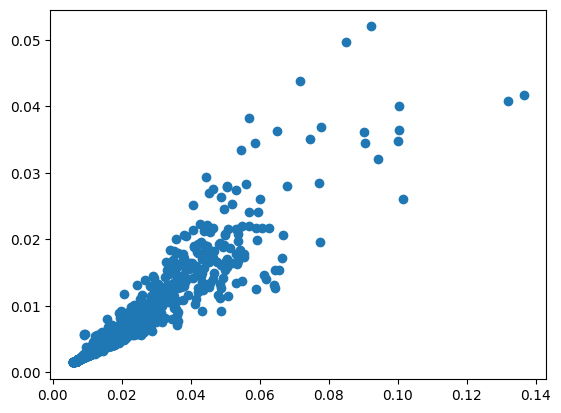

In [69]:
plt.scatter(data["SIGMEAN"], data["SIGSTD"])


In [60]:
data[data["SIGMEAN"]>0.04].sort_values("SIGMEAN")

,DATE-OBS,TELESCOP,IMAGETYP,FILTER,CLIPMEAN,CLIPMED,CLIPSTD,CLIPMIN,CLIPMAX,SIGMEAN,SIGMED,SIGSTD,REFRMS,sanity_check,violations
7969,2025-02-27T00:00:00.000,7DT15,FLAT,z,0.988251,1.000904,0.061256,0.804069,1.125608,0.040381,0.043137,0.016431,0.008549,True,NaN
7957,2025-02-27T00:00:00.000,7DT12,FLAT,m850,0.988833,1.002593,0.070586,0.776578,1.187904,0.040560,0.042699,0.014218,0.018406,True,NaN
602,2024-09-05T00:00:00.000,7DT04,FLAT,i,0.992830,1.000827,0.049416,0.844448,1.140064,0.040603,0.035713,0.021391,0.022424,True,NaN
9526,2025-03-27T00:00:00.000,7DT14,FLAT,r,0.986669,1.000873,0.054242,0.823197,1.116036,0.040750,0.035327,0.025103,0.008868,True,NaN
705,2024-09-10T00:00:00.000,7DT03,FLAT,i,0.989315,1.001317,0.049948,0.838998,1.139146,0.040945,0.038165,0.018834,0.011493,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9554,2025-03-27T00:00:00.000,7DT08,FLAT,r,0.988395,1.000171,0.051250,0.834464,1.118375,0.100217,0.104710,0.036457,0.008740,True,NaN
9507,2025-03-27T00:00:00.000,7DT05,FLAT,r,0.988471,1.000991,0.053622,0.827273,1.106291,0.100339,0.097862,0.040091,0.015272,True,NaN
7649,2025-02-22T00:00:00.000,7DT11,FLAT,m850,0.995973,1.006003,0.103032,0.686841,1.203152,0.101445,0.101775,0.026064,0.074047,False,CLIPMIN=0.686841 <= 0.7
7605,2025-02-22T00:00:00.000,7DT13,FLAT,m875,0.991360,1.003605,0.105651,0.674393,1.209865,0.132052,0.129439,0.040768,0.078027,False,CLIPMIN=0.674393 <= 0.7


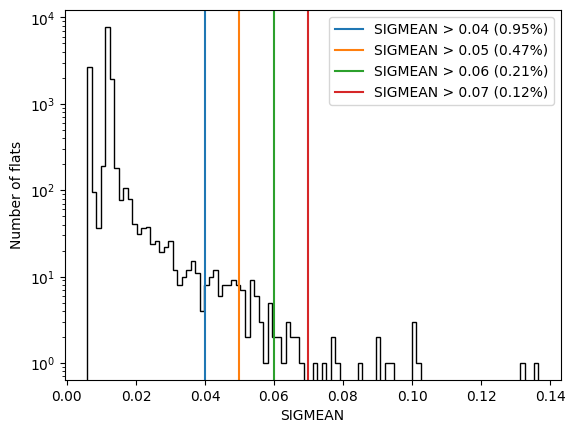

In [79]:
plt.hist(data["SIGMEAN"], bins=100, histtype="step", color="k")
plt.yscale("log")
plt.axvline(0.04, color="C0", label=f"SIGMEAN > 0.04 ({len(data[data['SIGMEAN']>0.04])/len(data)*100:.2f}%)")
plt.axvline(0.05, color="C1", label=f"SIGMEAN > 0.05 ({len(data[data['SIGMEAN']>0.05])/len(data)*100:.2f}%)")
plt.axvline(0.06, color="C2", label=f"SIGMEAN > 0.06 ({len(data[data['SIGMEAN']>0.06])/len(data)*100:.2f}%)")
plt.axvline(0.07, color="C3", label=f"SIGMEAN > 0.07 ({len(data[data['SIGMEAN']>0.07])/len(data)*100:.2f}%)")
plt.xlabel("SIGMEAN")
plt.ylabel("Number of flats")
plt.legend()

In [81]:
from astropy.io import fits

In [53]:
len(data[data["SIGMEAN"] > 0.07])/len(data)*100

0.11752607609813426

In [40]:
subdata

,DATE-OBS,TELESCOP,IMAGETYP,FILTER,CLIPMEAN,CLIPMED,CLIPSTD,CLIPMIN,CLIPMAX,SIGMEAN,SIGMED,SIGSTD,REFRMS,sanity_check,violations
7625,2025-02-22T00:00:00.000,7DT12,FLAT,m850,0.988678,1.003148,0.064578,0.794718,1.176138,0.014301,0.012565,0.005950,0.026738,True,NaN
7649,2025-02-22T00:00:00.000,7DT11,FLAT,m850,0.995973,1.006003,0.103032,0.686841,1.203152,0.101445,0.101775,0.026064,0.074047,False,CLIPMIN=0.686841 <= 0.7


In [ ]:
from astropy.stats import sigma_clipped_stats

In [44]:
mean, median, std = sigma_clipped_stats(data["CLIPMIN"])

In [45]:
mean-10*std

0.6913376641162616

0.010154802175841682 0.0091316513537398 0.002996912671417137


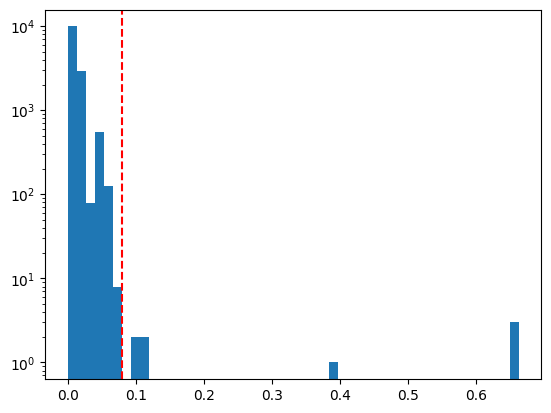

In [51]:
from astropy.stats import sigma_clipped_stats

mean, median, std = sigma_clipped_stats(data["REFRMS"])
print(mean, median, std)

plt.hist(data["REFRMS"], bins=50)
plt.yscale("log")
plt.axvline(0.08, color="red", linestyle="--")
plt.show()

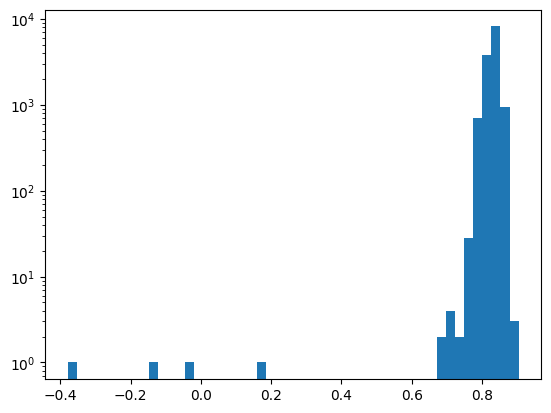

In [18]:
plt.hist(data["CLIPMIN"], bins=50)
plt.yscale("log")

In [116]:
def plot_pars(data, tel="7DT05", input_filt=None):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
    

    # Convert DATE-OBS to datetime if not already
    data['DATE-OBS'] = pd.to_datetime(data['DATE-OBS'])

    data = data[data['TELESCOP'] == tel]
    #data = data[data[par]!=0]
    for par, ax in zip(["CLIPMIN", "CLIPMAX", "SIGMEAN", "REFRMS"], [ax1, ax2, ax3, ax4]):
        if input_filt is not None:
            subdata = data[data['FILTER'] == input_filt]
            ax.scatter(subdata['DATE-OBS'], subdata[par], label=input_filt, marker="o", color="g")
            ax.axhline(subdata[par].median(), color="r", linestyle="--")
            
        else:   
            for filt in data['FILTER'].unique():
                subdata = data[data['FILTER'] == filt]
                ax.plot(subdata['DATE-OBS'], subdata[par], label=filt, marker="o")
        
        ax.set_ylabel(par)
        
        #ax1.set_yscale("log")
        #ax.set_title(f'{par} vs Date')
        ax.tick_params(axis='x', rotation=45)
        ax.legend()
    ax4.set_xlabel('Date')
    plt.tight_layout()
    plt.show()

In [4]:
from matplotlib import pyplot as plt
import pandas as pd

In [5]:
data = pd.read_csv(f'/tmp/pipeline/dark.ecsv', sep=' ', comment='#')

In [8]:
import numpy as np

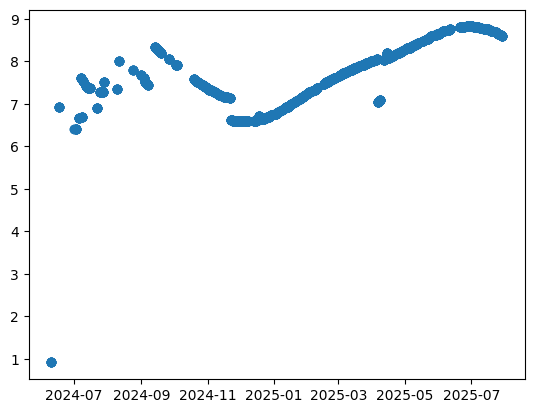

In [ ]:
data['DATE-OBS'] = pd.to_datetime(data['DATE-OBS'])
dd

NameError: name 'pd' is not defined

Text(0, 0.5, 'NHOTPIX')

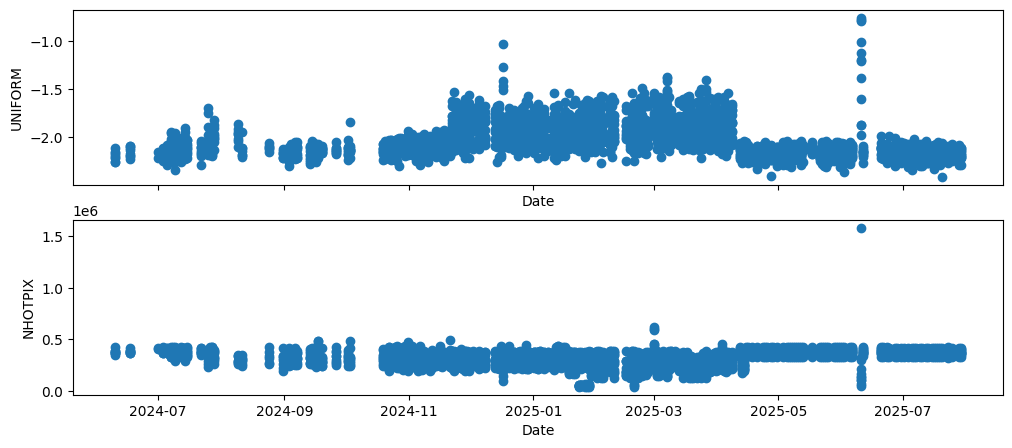

In [32]:
data['DATE-LOC'] = pd.to_datetime(data['DATE-LOC'])

data['TIME'] = data['DATE-LOC'].dt.time
data['TIME_HOURS'] = data['DATE-LOC'].dt.hour + data['DATE-LOC'].dt.minute/60 + data['DATE-LOC'].dt.second/3600

# Create figure with subplots
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(12, 5), sharex=True)
ax0.scatter(data['DATE-LOC'], data['UNIFORM'])
ax0.set_xlabel('Date')
ax0.set_ylabel('UNIFORM')

ax1.scatter(data['DATE-LOC'], data['NHOTPIX'])
ax1.set_xlabel('Date')
ax1.set_ylabel('NHOTPIX')


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
data = pd.read_csv("/tmp/pipeline/dark.ecsv", sep=" ", comment="#")

In [ ]:
from astropy.stats import sigma_clipped_stats

In [11]:
mean, median, std = sigma_clipped_stats(data["CLIPMED"])
print(mean, median, std)

1.3438588850174216 1.0 1.7594039775995682


In [13]:
mean+5*std

10.140878773015263

In [17]:
sum(data["CLIPMED"]<20)/len(data["CLIPMED"])

0.9930178432893716

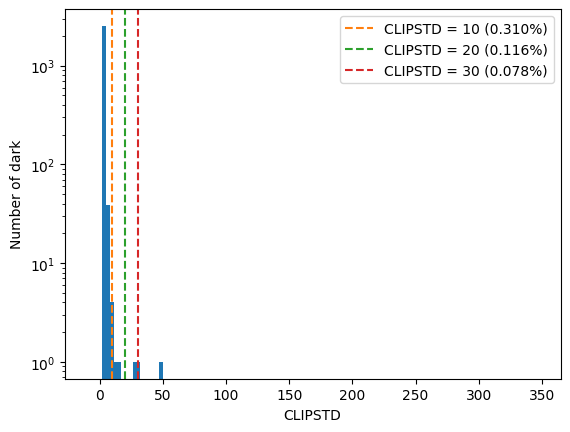

In [27]:
plt.hist(data["CLIPSTD"], bins=np.arange(-10, 350, 3))
plt.yscale("log")
plt.xlabel("CLIPSTD")
plt.ylabel("Number of dark")
plt.axvline(10, color="C1", linestyle="--", label="CLIPSTD = 10 ({:.3f}%)".format(100-sum(data["CLIPSTD"]<10)/len(data["CLIPSTD"])*100))
plt.axvline(20, color="C2", linestyle="--", label="CLIPSTD = 20 ({:.3f}%)".format(100-sum(data["CLIPSTD"]<20)/len(data["CLIPSTD"])*100))
plt.axvline(30, color="C3", linestyle="--", label="CLIPSTD = 30 ({:.3f}%)".format(100-sum(data["CLIPSTD"]<30)/len(data["CLIPSTD"])*100))
plt.legend()
plt.show()

In [3]:
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv("/tmp/pipeline/dark.ecsv", sep=" ", comment="#")

In [27]:
data[data["UNIFORM"]<-2.15]["TELESCOP"].value_counts()

7DT07    69
7DT08    66
7DT11    61
7DT02    61
7DT09    51
7DT14    46
7DT05    44
7DT13    34
7DT03    31
7DT10    31
7DT04    31
7DT12    29
7DT06    28
7DT01    25
7DT15    25
7DT16    23
Name: TELESCOP, dtype: int64

In [28]:
data[data["UNIFORM"]<-2.15]["TELESCOP"].value_counts()/data["TELESCOP"].value_counts()*100

7DT01    47.169811
7DT02    37.423313
7DT03    19.871795
7DT04    18.452381
7DT05    23.529412
7DT06    46.666667
7DT07    32.547170
7DT08    30.841121
7DT09    24.170616
7DT10    14.485981
7DT11    28.372093
7DT12    20.567376
7DT13    19.101124
7DT14    26.285714
7DT15    17.857143
7DT16    25.274725
Name: TELESCOP, dtype: float64

In [ ]:
pldd

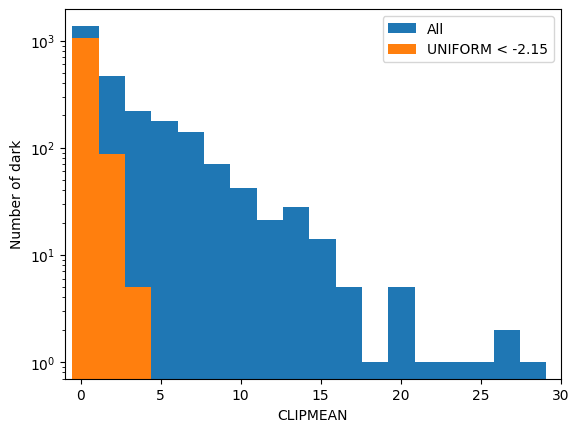

In [23]:
h = plt.hist(data["CLIPMEAN"], bins=200, label="All")
plt.hist(data[data["UNIFORM"]<-2.1]["CLIPMEAN"], bins=h[1], label="UNIFORM < -2.15")
plt.xlabel("CLIPMEAN")
plt.ylabel("Number of dark")
plt.xlim(-1, 30)
plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
data[data["UNIFORM"]

0      -2.203429
1      -2.255863
2      -2.159032
3      -2.261245
4      -2.114075
          ...   
2573   -2.211444
2574   -2.165952
2575   -2.116945
2576   -2.288741
2577   -2.191045
Name: UNIFORM, Length: 2578, dtype: float64

In [55]:
len(data)

13614

In [50]:
len(data[data["UNIFORM"]>-1.9])/len(data)*100

21.334367726920092

In [45]:
data[data["UNIFORM"]>-2].sort_values("UNIFORM")

,DATE-OBS,TELESCOP,IMAGETYP,FILTER,CLIPMEAN,CLIPMED,CLIPSTD,CLIPMIN,CLIPMAX,NDELTA,NHOTPIX,CCD-TEMP,UNIFORM
689,2024-11-29T00:00:00.000,7DT14,DARK,m775,2.146620,2.0,2.726848,-6.0,10.0,3.186600,286958,-10.0,-1.999944
678,2024-11-29T00:00:00.000,7DT15,DARK,u,1.257499,1.0,2.681372,-6.0,9.0,0.081800,380990,-9.9,-1.999854
889,2024-12-28T00:00:00.000,7DT08,DARK,m725,1.539841,2.0,2.635739,-6.0,9.0,-1.301900,328092,-9.8,-1.999536
719,2024-12-07T00:00:00.000,7DT07,DARK,m675,1.648296,2.0,2.696170,-6.0,9.0,0.067700,349523,-9.9,-1.999431
1528,2025-03-14T00:00:00.000,7DT05,DARK,m750,4.304904,4.0,3.040943,-4.0,13.0,0.892100,269914,-10.0,-1.998125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,2024-12-16T00:00:00.000,7DT13,DARK,m875,66.706779,65.0,15.636944,20.0,113.0,58.152901,90590,-9.9,-1.030960
2256,2025-06-09T00:00:00.000,7DT13,DARK,m875,68.823372,67.0,13.741378,28.0,110.0,40.348701,106755,-9.9,-1.002323
2248,2025-06-09T00:00:00.000,7DT16,DARK,z,160.009811,156.0,31.364809,66.0,254.0,100.325302,63365,-10.0,-0.785517
2258,2025-06-09T00:00:00.000,7DT15,DARK,m725,328.613617,327.0,48.641624,183.0,474.0,88.020905,51390,-9.9,-0.777136


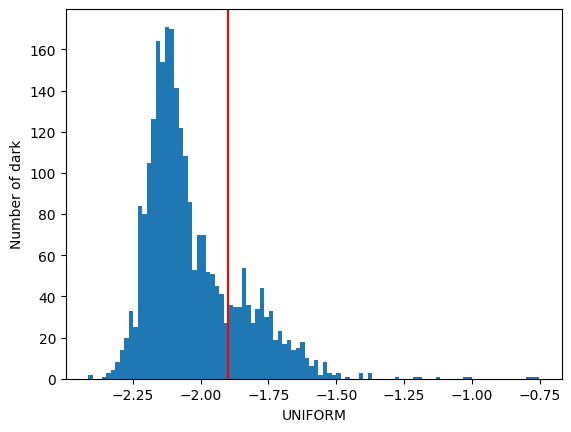

In [39]:
plt.hist(data["UNIFORM"], bins=100)
plt.xlabel("UNIFORM")
plt.ylabel("Number of dark")
plt.axvline(-1.9, color="r")
plt.show()

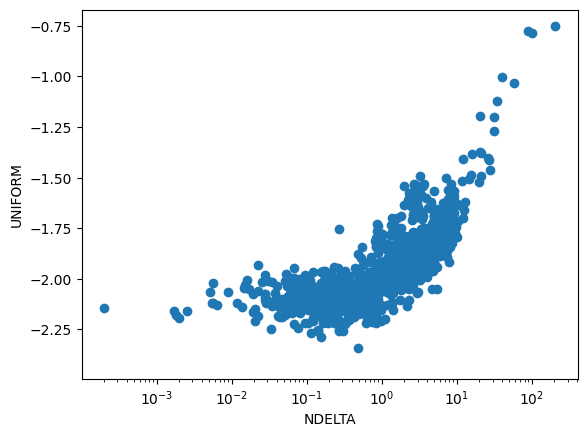

In [9]:
plt.plot(data["NDELTA"], data["UNIFORM"], "o")
plt.xlabel("NDELTA")
plt.ylabel("UNIFORM")
plt.xscale("log")
plt.show()

In [19]:
df

,CLIPMED,CLIPSTD,NDELTA,UNIFORM
0,0.0,2.439486,-0.3695,-2.203429
1,0.0,2.375280,-0.3145,-2.255863
2,0.0,2.504143,-0.8085,-2.159032
3,0.0,2.389754,-2.9490,-2.261245
4,0.0,2.443116,-0.4909,-2.114075
...,...,...,...,...
2573,0.0,2.494854,-0.8784,-2.211444
2574,0.0,2.472641,-0.8815,-2.165952
2575,0.0,2.506493,-0.8089,-2.116945
2576,0.0,2.278982,-0.2567,-2.288741


In [24]:
df = np.nan_to_num(df)

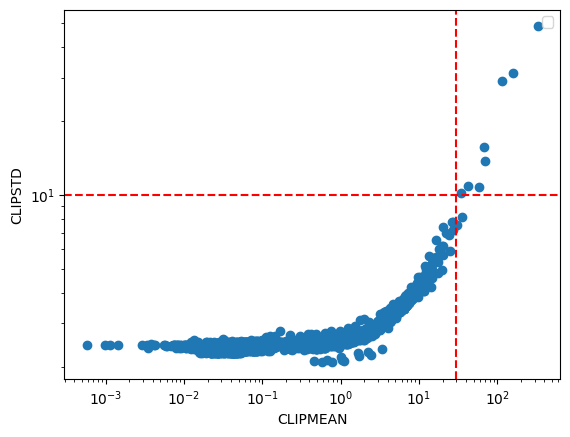

In [33]:
plt.plot(data["CLIPMEAN"], data["CLIPSTD"], "o")
plt.xlabel("CLIPMEAN")
plt.ylabel("CLIPSTD")
plt.xscale("log")
plt.yscale("log")
plt.axvline(30, color="r", linestyle="--")
plt.axhline(10, color="r", linestyle="--")
plt.legend()
plt.show()

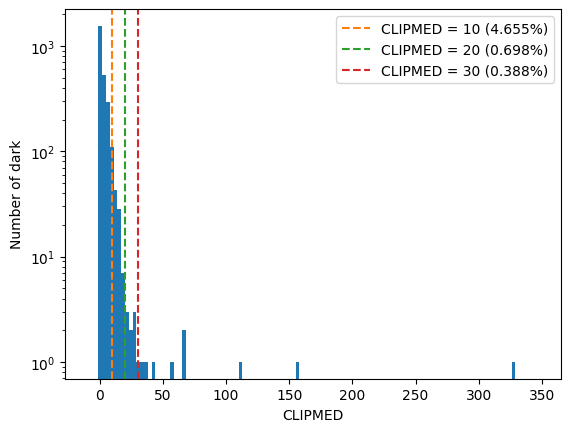

In [25]:
plt.hist(data["CLIPMED"], bins=np.arange(-10, 350, 3))
plt.yscale("log")
plt.xlabel("CLIPMED")
plt.ylabel("Number of dark")
plt.axvline(10, color="C1", linestyle="--", label="CLIPMED = 10 ({:.3f}%)".format(100-sum(data["CLIPMED"]<10)/len(data["CLIPMED"])*100))
plt.axvline(20, color="C2", linestyle="--", label="CLIPMED = 20 ({:.3f}%)".format(100-sum(data["CLIPMED"]<20)/len(data["CLIPMED"])*100))
plt.axvline(30, color="C3", linestyle="--", label="CLIPMED = 30 ({:.3f}%)".format(100-sum(data["CLIPMED"]<30)/len(data["CLIPMED"])*100))
plt.legend()
plt.show()

In [93]:
data[data["NDELTA"]>9].sort_values(by="CLIPMED")

,DATE-OBS,TELESCOP,IMAGETYP,FILTER,CLIPMEAN,CLIPMED,CLIPSTD,CLIPMIN,CLIPMAX,NDELTA,NHOTPIX,CCD-TEMP
1346,2025-02-22T00:00:00.000,7DT11,DARK,m850,5.916508,6.0,3.573512,-4.0,16.0,9.584900,139759,-10.1
1453,2025-03-06T00:00:00.000,7DT11,DARK,m850,8.431501,8.0,4.203094,-4.0,21.0,12.548300,238955,-10.0
1625,2025-03-24T00:00:00.000,7DT11,DARK,m850,8.348295,8.0,3.988434,-3.0,20.0,9.223700,225964,-10.0
1537,2025-03-16T00:00:00.000,7DT11,DARK,m850,8.800448,9.0,4.091385,-3.0,21.0,10.027100,212040,-10.0
1728,2025-04-04T00:00:00.000,7DT11,DARK,m850,8.959646,9.0,4.109533,-3.0,21.0,9.770600,213680,-10.1
1549,2025-03-17T00:00:00.000,7DT11,DARK,m850,9.261206,9.0,4.153153,-3.0,21.0,10.469400,217443,-10.0
1203,2025-02-02T00:00:00.000,7DT13,DARK,m875,10.756280,11.0,4.539917,-2.0,24.0,9.212300,155188,-9.9
1247,2025-02-08T00:00:00.000,7DT13,DARK,m875,11.299795,11.0,4.633103,-2.0,25.0,9.761300,203398,-9.9
1259,2025-02-14T00:00:00.000,7DT13,DARK,m875,10.873469,11.0,4.541655,-2.0,24.0,9.153100,154906,-10.0
1671,2025-03-30T00:00:00.000,7DT13,DARK,m875,11.241943,11.0,4.430141,-2.0,24.0,10.810000,204479,-10.0


In [4]:
data["CLIPMED"]

NameError: name 'data' is not defined

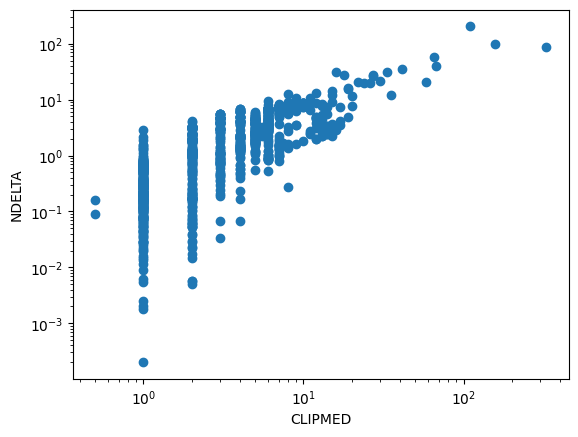

In [86]:
plt.scatter(data["CLIPMED"], data["NDELTA"])
plt.xlabel("CLIPMED")
plt.ylabel("NDELTA")
plt.yscale("log")
plt.xscale("log")
plt.show()

In [67]:
from astropy.io import fits

In [ ]:

def delta_edge_center(data, check_size=100):
    h, w = data.shape
    s = check_size  # Focus on size 100
    s_eff = int(min(s, h//4, w//4))

    # Square regions: top-left, top-right, bottom-left, bottom-right
    top_left = data[:s_eff, :s_eff]
    top_right = data[:s_eff, -s_eff:]
    bottom_left = data[-s_eff:, :s_eff]
    bottom_right = data[-s_eff:, -s_eff:]
    # Center square
    cy, cx = h//2, w//2
    hs = s_eff//2
    cy0, cy1 = max(0, cy - hs), min(h, cy + hs)
    cx0, cx1 = max(0, cx - hs), min(w, cx + hs)
    center = data[cy0:cy1, cx0:cx1]
    
    
    edge_means = np.array([np.median(top_left), np.median(top_right), np.median(bottom_left), np.median(bottom_right)])
    
    edge_avg = max(edge_means)
    center_mean = center.mean()
    delta = edge_avg - center_mean
    return delta


In [49]:
from astropy.io import fits

In [50]:
data = fits.getheader("/lyman/data2/_master_frame/2025-06-01/7DT14/dark_100s_7DT14_20250602_1x1_gain2750_C31243.fits")

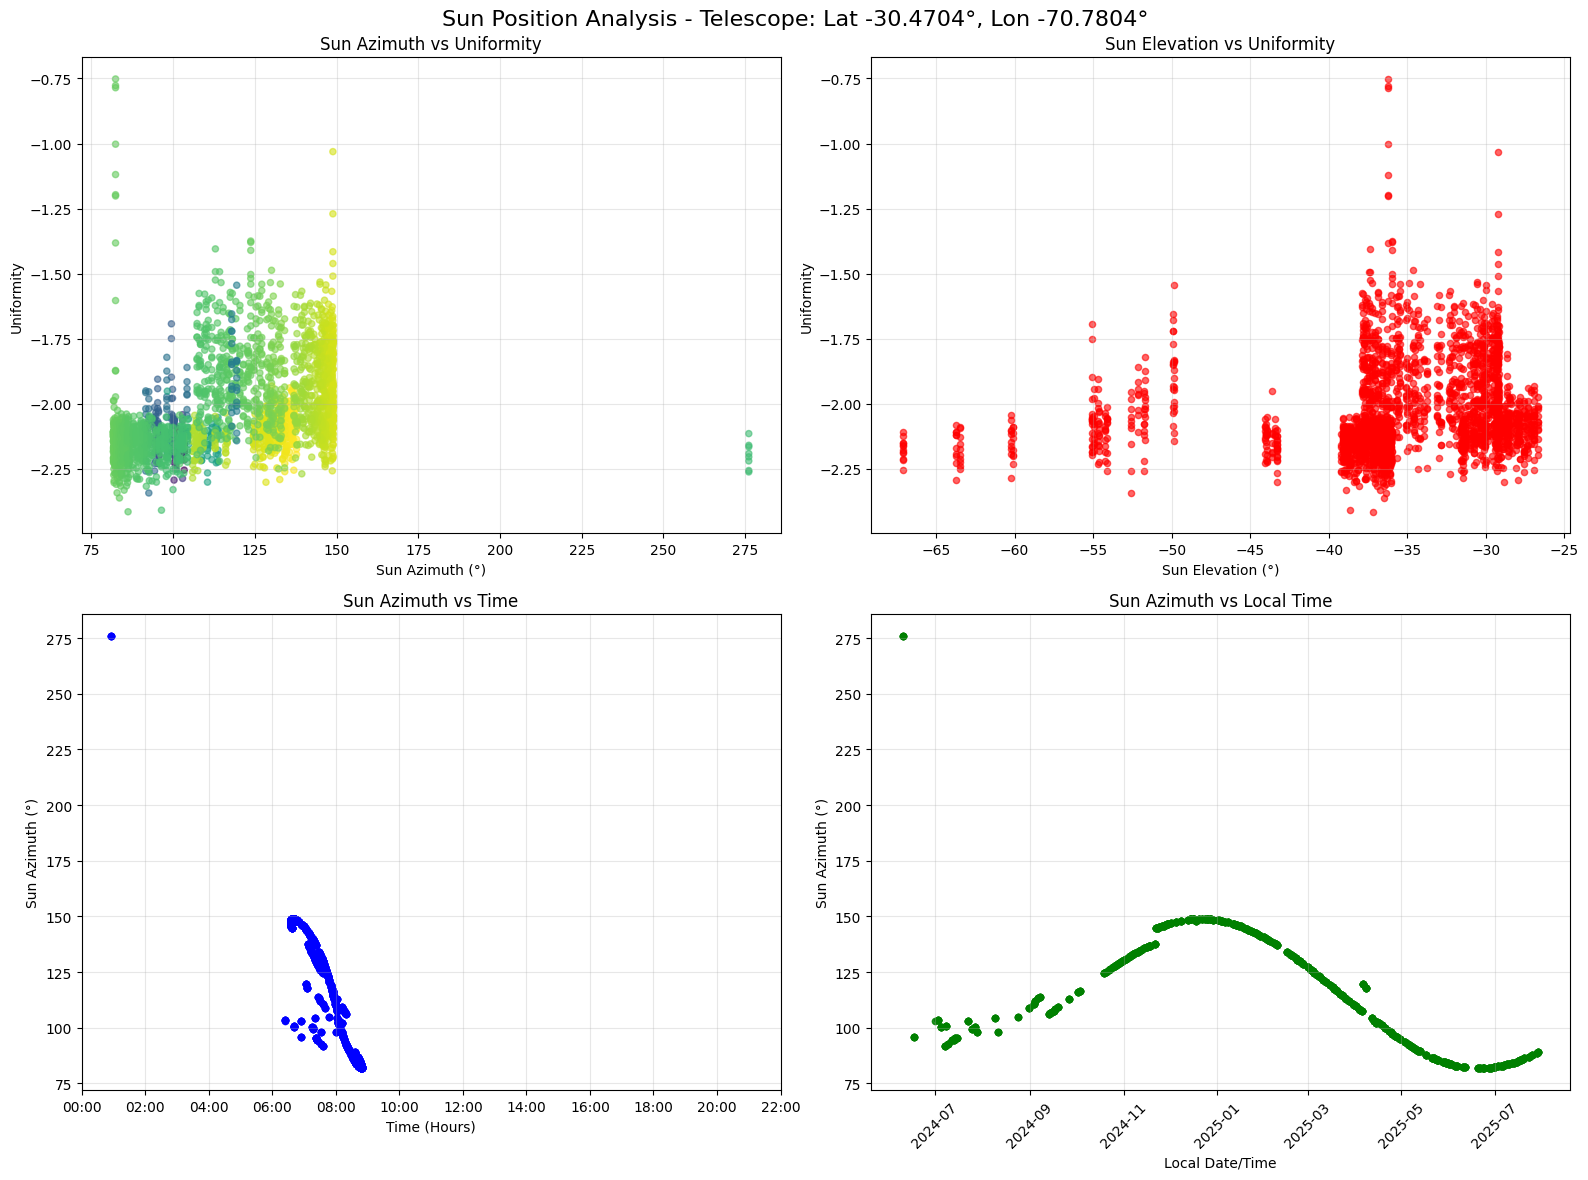

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time
from astropy.coordinates import EarthLocation, AltAz, get_sun
from astropy import units as u


# Telescope coordinates
LAT = -30.4704
LON = -70.7804

data = pd.read_csv('/tmp/pipeline/dark.ecsv', sep=' ', comment='#')

data['DATE-LOC'] = pd.to_datetime(data['DATE-LOC'])

sun_positions = []

for idx, row in data.iterrows():
    try:
        # Create Earth location
        location = EarthLocation(lat=LAT*u.deg, lon=LON*u.deg)
        
        # Convert to astropy time
        astropy_time = Time(row['DATE-LOC'])
        
        # Get sun position
        sun = get_sun(astropy_time)
        
        # Calculate alt/az coordinates
        altaz = AltAz(location=location, obstime=astropy_time)
        sun_altaz = sun.transform_to(altaz)
        
        sun_positions.append({'azimuth': sun_altaz.az.deg, 'elevation': sun_altaz.alt.deg})
    except Exception as e:
        sun_positions.append({'azimuth': np.nan, 'elevation': np.nan})

# Add sun position data to dataframe
sun_df = pd.DataFrame(sun_positions)
data['SUN_AZ'] = sun_df['azimuth']
data['SUN_ALT'] = sun_df['elevation']

# Extract time component for plotting
data['TIME_HOURS'] = data['DATE-LOC'].dt.hour + data['DATE-LOC'].dt.minute/60 + data['DATE-LOC'].dt.second/3600


    

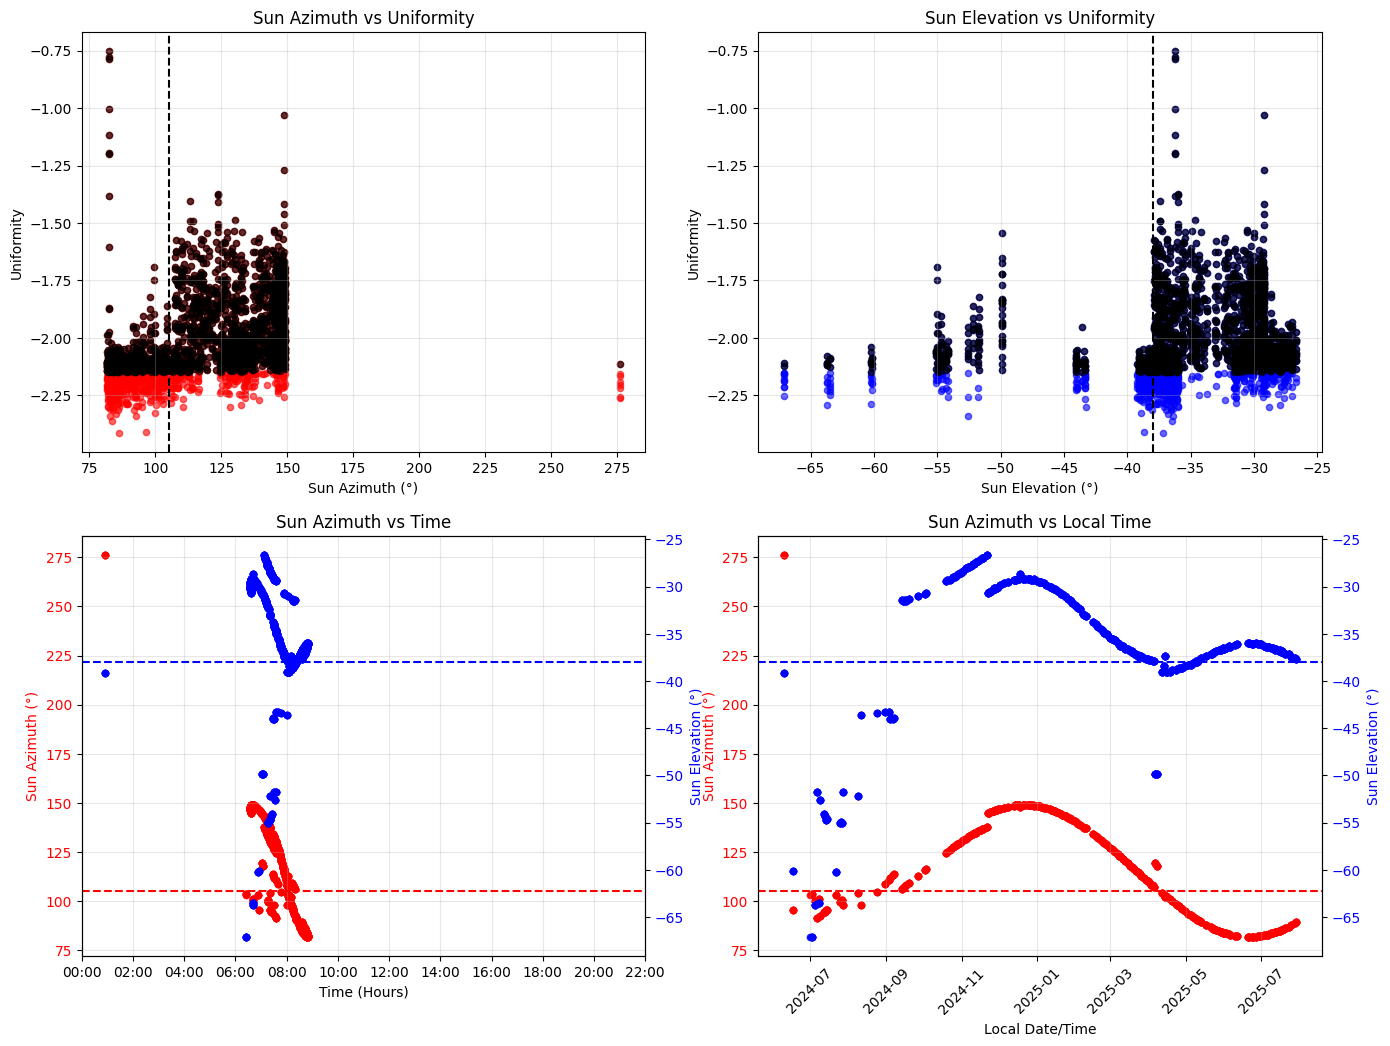

In [48]:

# Create the three plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Azimuth vs Uniformity
scatter1 = ax1.scatter(data['SUN_AZ'], data['UNIFORM'], alpha=0.6, s=20, color='red')

scatter1 = ax1.scatter(data['SUN_AZ'][data['UNIFORM']>-2.15], data['UNIFORM'][data['UNIFORM']>-2.15], alpha=0.6, s=20, color='k')

ax1.set_xlabel('Sun Azimuth (°)')
ax1.set_ylabel('Uniformity')
ax1.set_title('Sun Azimuth vs Uniformity')
ax1.axvline(105, color='k', linestyle='--')
ax1.grid(True, alpha=0.3)

# Plot 2: Elevation vs Uniformity
ax2.scatter(data['SUN_ALT'], data['UNIFORM'], alpha=0.6, s=20, color='blue')
ax2.scatter(data['SUN_ALT'][data['UNIFORM']>-2.15], data['UNIFORM'][data['UNIFORM']>-2.15], alpha=0.6, s=20, color='k')
ax2.set_xlabel('Sun Elevation (°)')
ax2.set_ylabel('Uniformity')
ax2.set_title('Sun Elevation vs Uniformity')
ax2.axvline(-38, color='k', linestyle='--')
ax2.grid(True, alpha=0.3)

# Plot 3: Azimuth vs Time
ax3.scatter(data['TIME_HOURS'], data['SUN_AZ'], alpha=0.6, s=20, color='red')
ax3.set_xlabel('Time (Hours)')
ax3.set_ylabel('Sun Azimuth (°)', color='red')
ax3.tick_params(axis='y', labelcolor='red')
ax3.set_title('Sun Azimuth vs Time')
ax3.axhline(105, color='red', linestyle='--')

ax3.grid(True, alpha=0.3)

# Twin axis for elevation
ax3_twin = ax3.twinx()
ax3_twin.scatter(data['TIME_HOURS'], data['SUN_ALT'], alpha=0.6, s=20, color='blue', label='Elevation')
ax3_twin.set_ylabel('Sun Elevation (°)', color='blue')
ax3_twin.tick_params(axis='y', labelcolor='blue')
ax3_twin.axhline(-38, color='blue', linestyle='--')
# Add time labels on x-axis
time_ticks = np.arange(0, 24, 2)
ax3.set_xticks(time_ticks)
ax3.set_xticklabels([f'{int(h):02d}:00' for h in time_ticks])

# Plot 4: Azimuth vs Local Time (DATE-LOC)
ax4.scatter(data['DATE-LOC'], data['SUN_AZ'], alpha=0.6, s=20, color='red')
#ax4.scatter(data['DATE-LOC'][data["UNIFORM"]<-2.15], data['SUN_AZ'][data["UNIFORM"]<-2.15], alpha=0.6, s=20, color='k')
ax4.set_xlabel('Local Date/Time')
ax4.set_ylabel('Sun Azimuth (°)', color='red')
ax4.tick_params(axis='y', labelcolor='red')
ax4.set_title('Sun Azimuth vs Local Time')
ax4.axhline(105, color='red', linestyle='--')
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

# Twin axis for elevation
ax4_twin = ax4.twinx()
ax4_twin.scatter(data['DATE-LOC'], data['SUN_ALT'], alpha=0.6, s=20, color='blue', label='Elevation')
#ax4_twin.scatter(data['DATE-LOC'][data["UNIFORM"]<-2.15], data['SUN_ALT'][data["UNIFORM"]<-2.15], alpha=0.6, s=20, color='k')
ax4_twin.set_ylabel('Sun Elevation (°)', color='blue')
ax4_twin.tick_params(axis='y', labelcolor='blue')
ax4_twin.axhline(-38, color='blue', linestyle='--')



In [83]:
delta_edge_center(data)

[0. 0. 0. 0.]


-0.2582

In [38]:
import pandas as pd
from astropy.stats import sigma_clipped_stats

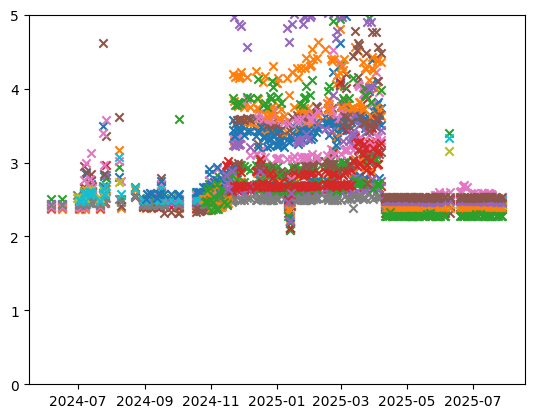

In [74]:
for i, tel in enumerate(data["TELESCOP"].unique()):
    
    subdata = data[data["TELESCOP"] == tel]
    plt.scatter(subdata['DATE-OBS'], subdata["CLIPSTD"], marker="x")
    plt.ylim(0, 5)

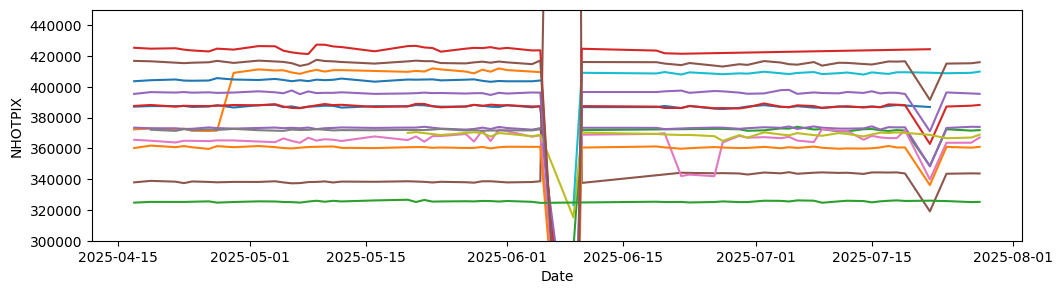

In [20]:
f, ax = plt.subplots(1,1, figsize=(12, 3), sharex=True)
for i, tel in enumerate(data["TELESCOP"].unique()):
    subdata = data[data["TELESCOP"] == tel]
    subdata = subdata[subdata["DATE-OBS"] > "2025-04-15"]
    ax.plot(subdata['DATE-OBS'], subdata['NHOTPIX'], label=tel)
ax.set_ylim(300000, 450000)
ax.set_xlabel("Date")
ax.set_ylabel("NHOTPIX")

    
plt.show()

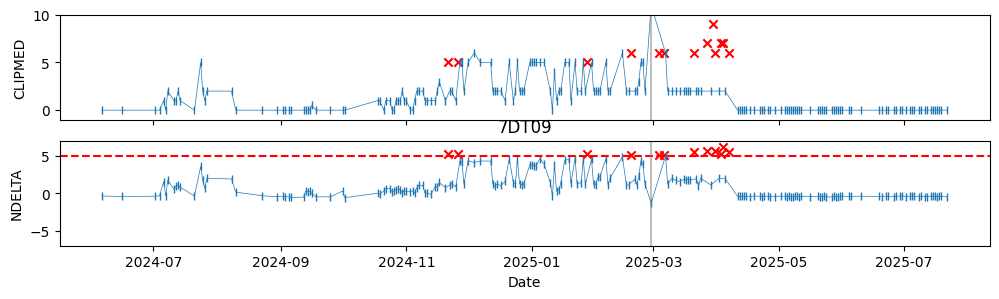

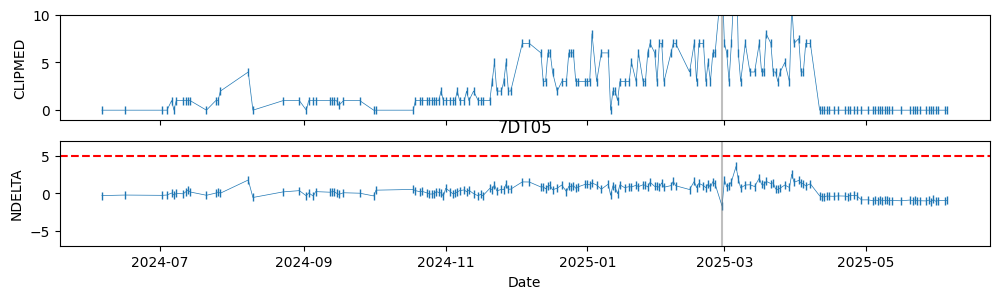

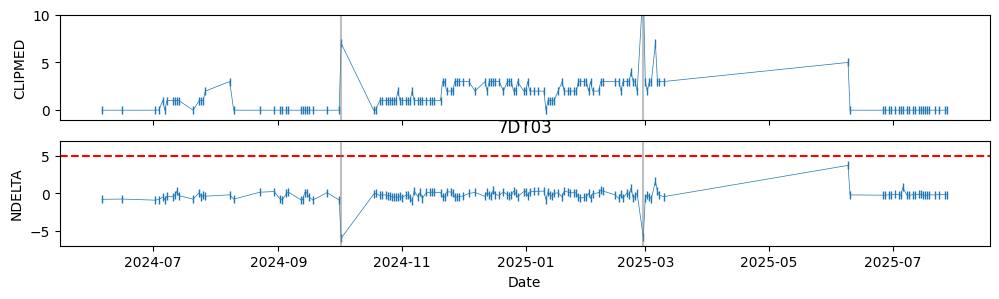

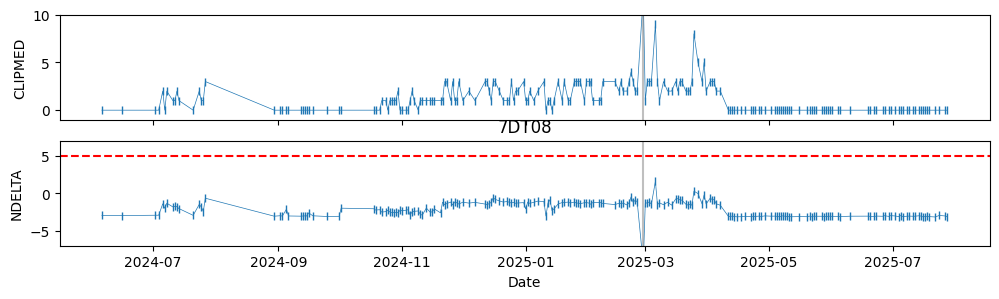

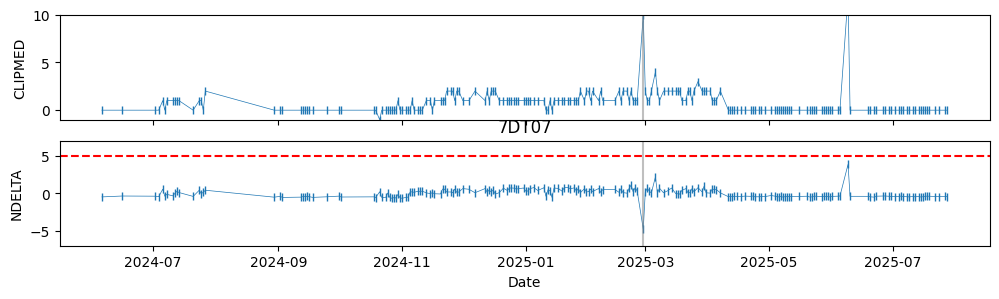

/tmp/ipykernel_375704/216209849.py:25: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(-7, 7)


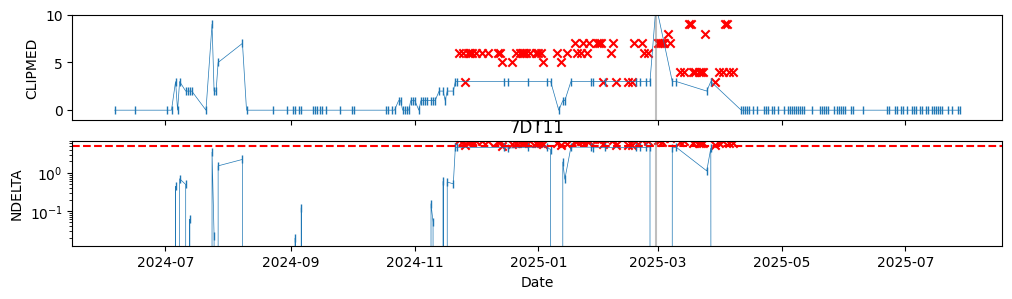

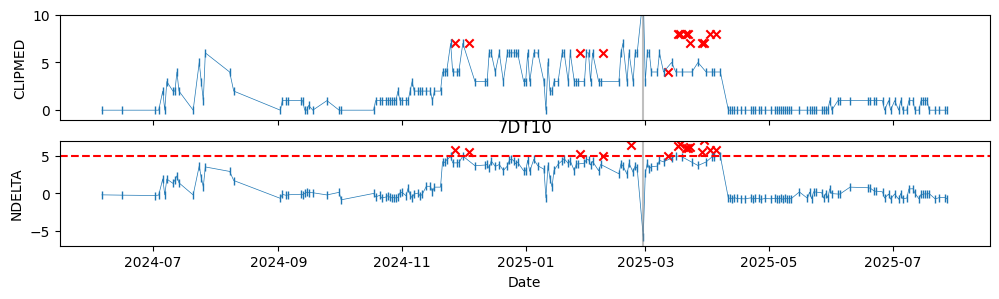

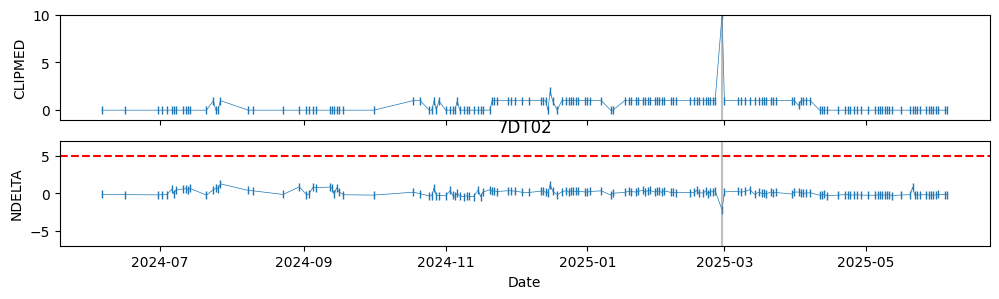

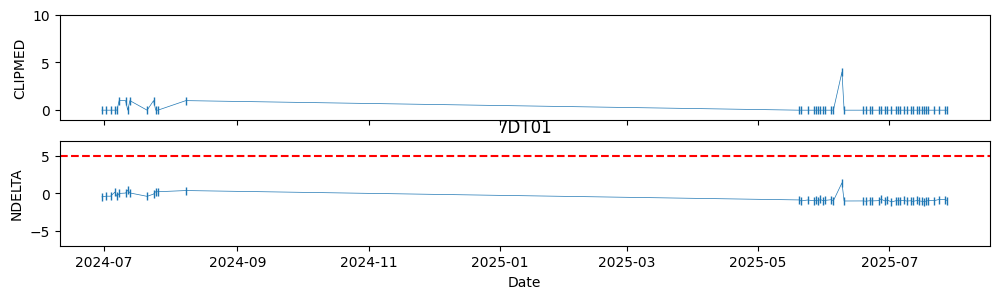

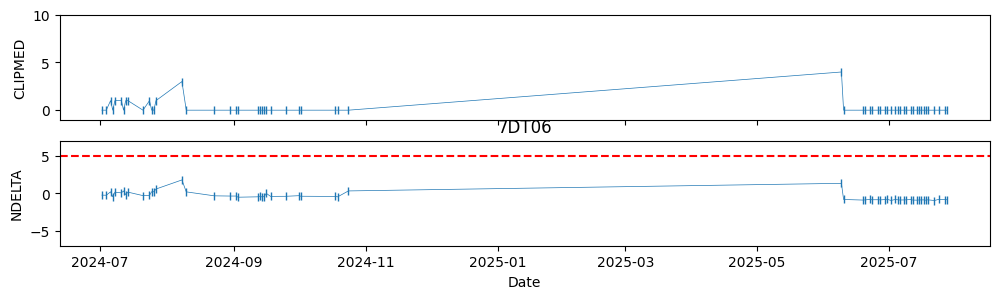

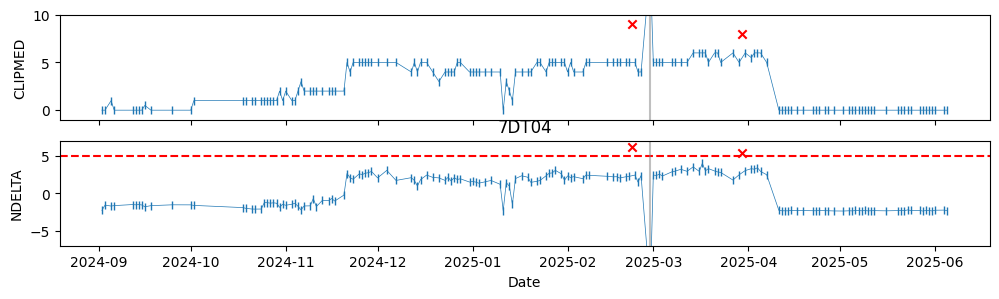

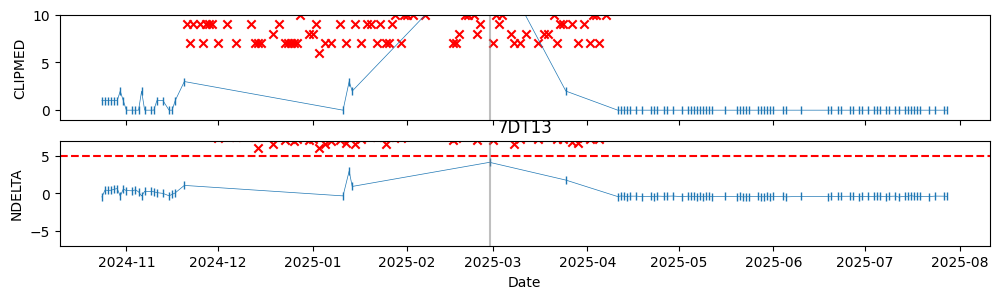

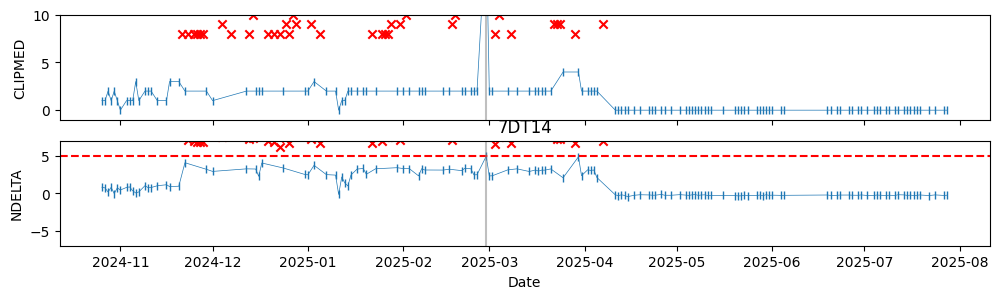

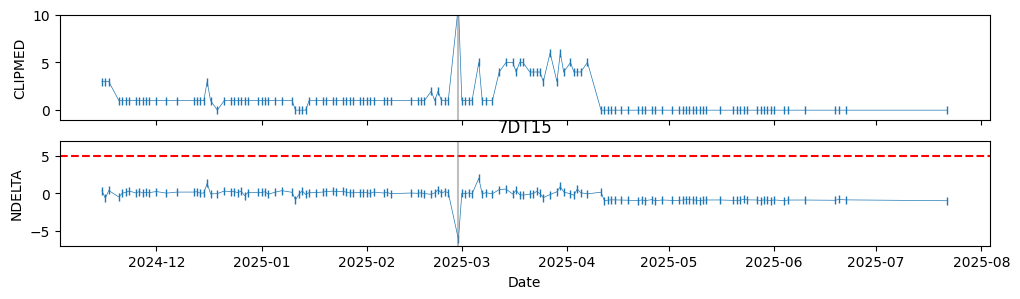

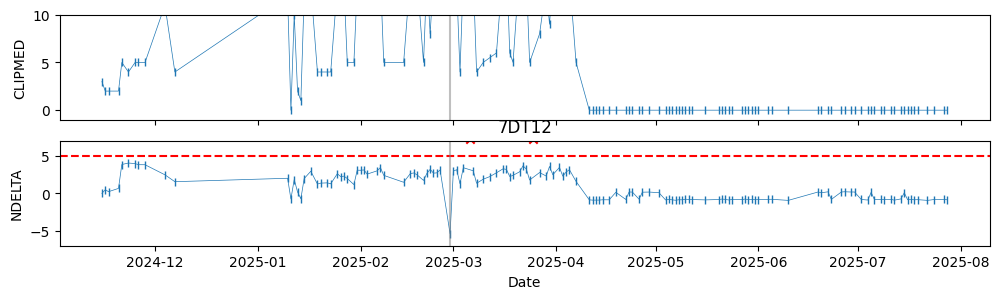

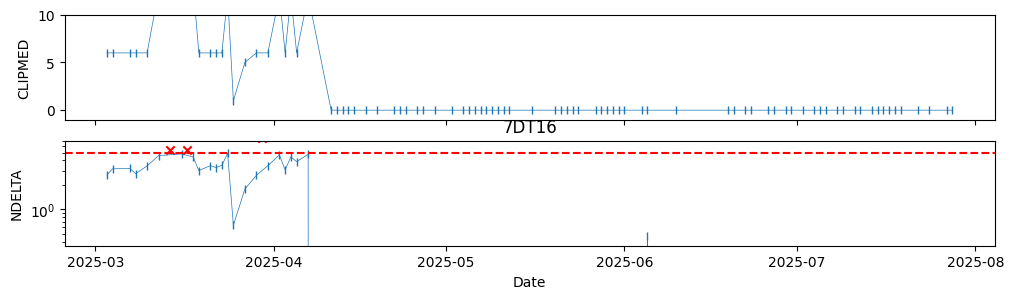

In [78]:
data['DATE-OBS'] = pd.to_datetime(data['DATE-OBS'])

for i, tel in enumerate(data["TELESCOP"].unique()):
    f, ax = plt.subplots(2,1, figsize=(12, 3), sharex=True)
    subdata = data[data["TELESCOP"] == tel]
    # if tel not in ["7DT01", "7DT02", "7DT03", "7DT04", "7DT06", "7DT07", "7DT08", "7DT15"]:
    #     continue

    #ax[1].scatter(subdata['DATE-OBS'], subdata["NDELTA"], marker="|")
    bad = 5#min(np.percentile(subdata["NDELTA"], 95), 3)
    
    ax[1].plot(subdata['DATE-OBS'][subdata["NDELTA"]<bad], subdata["NDELTA"][subdata["NDELTA"]<bad], marker="|", lw=0.5)
    ax[1].scatter(subdata['DATE-OBS'][subdata["NDELTA"]>bad], subdata["NDELTA"][subdata["NDELTA"]>bad], marker="x", color="red")
    if max(subdata["NDELTA"]) > 100:
        ax[1].set_yscale("log")

    ax[0].plot(subdata['DATE-OBS'][subdata["NDELTA"]<bad], subdata["CLIPMED"][subdata["NDELTA"]<bad], marker="|", lw=0.5)
    ax[0].scatter(subdata['DATE-OBS'][subdata["NDELTA"]>bad], subdata["CLIPMED"][subdata["NDELTA"]>bad], marker="x", color="red")
    ax[0].set_ylim(-1, 10)
    #if max(subdata["NDELTA"]) <3:
    #    plt.ylim(-10, 10)
    #plt.axhline(10, color="red", linestyle="--")
    ax[1].axhline(5, color="red", linestyle="--")
    #ax[0].axhline(7, color="red", linestyle="--")
    ax[1].set_ylim(-7, 7)
    ax[0].set_ylabel("CLIPMED")

    ax[1].set_ylabel("NDELTA")
    plt.xlabel("Date")
    plt.title(tel)
    for d in subdata['DATE-OBS'][subdata["CCD-TEMP"]>0]:
        ax[0].axvline(d, color="gray", linestyle="-", alpha=0.5)
        ax[1].axvline(d, color="gray", linestyle="-", alpha=0.5)
    plt.show()




In [1]:
from uniformity import uniformity_cv2

In [53]:
fits_path = "/lyman/data2/_master_frame/2025-03-04/7DT09/dark_100s_7DT09_20250305_1x1_gain2750_C31165.fits"
fits.getheader(fits_path)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 9576                                                  
NAXIS2  =                 6388                                                  
EXTEND  =                    T                                                  
ALTITUDE=            39.999913 / [deg] Altitude of the telescope pointing       
AZIMUTH =           269.999758 / [deg] Azimuth of the telescope pointing        
CENTALT =            39.999913 / [deg] Altitude of the telescope pointing       
CENTAZ  =           269.999758 / [deg] Azimuth of the telescope pointing        
RA      =           199.300609 / [deg] Right ascension of the telescope pointing
DEC     =           -18.890488 / [deg] Declination of the telescope pointing    
AIRMASS =   1.55299512288939

In [54]:
fits_path = "/lyman/data2/_master_frame/2024-11-03/7DT05/dark_100s_7DT05_20241104_1x1_gain2750_C31116.fits"
fits.getheader(fits_path)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 9576                                                  
NAXIS2  =                 6388                                                  
EXTEND  =                    T                                                  
ALTITUDE=                 40.0 / [deg] Altitude of the telescope pointing       
AZIMUTH =                270.0 / [deg] Azimuth of the telescope pointing        
CENTALT =                 40.0 / [deg] Altitude of the telescope pointing       
CENTAZ  =                270.0 / [deg] Azimuth of the telescope pointing        
RA      =              74.1561 / [deg] Right ascension of the telescope pointing
DEC     =              -19.058 / [deg] Declination of the telescope pointing    
AIRMASS =   1.55299232714458

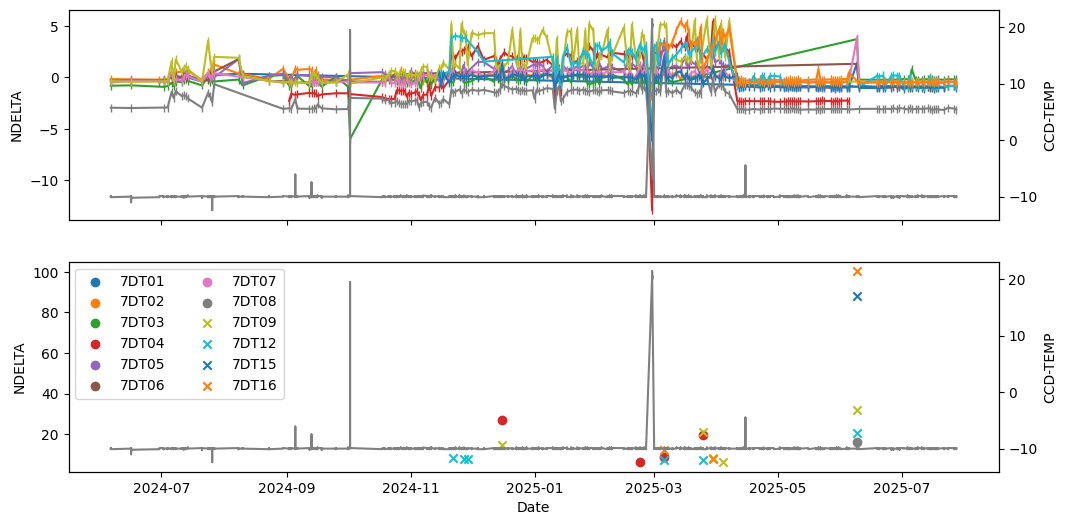

In [ ]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
data['DATE-OBS'] = pd.to_datetime(data['DATE-OBS'])
for i, tel in enumerate(data["TELESCOP"].unique()):

    if i>7:
        m = "x"
    else:
        m = "o"
    
    if i >= 9:
        tel = f"7DT{i+1}"
    else:
        tel = f"7DT0{i+1}"

    if tel in ["7DT10", "7DT11", "7DT13", "7DT14"]:
        continue


    subdata = data[data["TELESCOP"] == tel]
    n90th = 6

    ax.plot(subdata["DATE-OBS"][subdata["NDELTA"] < n90th], subdata["NDELTA"][subdata["NDELTA"] < n90th], marker="|")
    ax2.scatter(subdata["DATE-OBS"][subdata["NDELTA"] > n90th], subdata["NDELTA"][subdata["NDELTA"] > n90th], marker=m, label=tel)
ax2.legend(ncols=2, loc=2)
#aplt.yscale("log")

ax.set_ylabel("NDELTA")
ax3 = ax.twinx()
ax3.plot(data["DATE-OBS"], data["CCD-TEMP"], color="gray", zorder=-2)
ax3.set_ylabel("CCD-TEMP")

#ax2.set_ylim(-12, -9)
#ax2.set_yscale("log")
ax2.set_xlabel("Date")
ax2.set_ylabel("NDELTA")

ax4 = ax2.twinx()
ax4.plot(data["DATE-OBS"], data["CCD-TEMP"], color="gray", zorder=-2)
ax4.set_ylabel("CCD-TEMP")
plt.show()

#plt.yscale("log")


In [110]:
subdata = data[data["TELESCOP"] == "7DT08"]

In [1]:
from astropy.io import fits

In [2]:
data = fits.getdata("/lyman/data2/_master_frame/2025-02-28/7DT08/dark_100s_7DT08_20250301_1x1_gain2750_C31167.fits")

In [139]:
fdata = data.ravel()

In [3]:
test = []
for d in data:
    test.append((d>70) * (d<120))


In [112]:
subdata.sort_values(by="NDELTA")

,DATE-OBS,TELESCOP,IMAGETYP,FILTER,CLIPMEAN,CLIPMED,CLIPSTD,CLIPMIN,CLIPMAX,NDELTA,NHOTPIX,CCD-TEMP
1390,2025-02-28,7DT08,DARK,m725,11.606366,12.0,4.051212,0.0,23.0,-9.4622,275020,20.3
2538,2025-07-22,7DT08,DARK,m725,0.041334,0.0,2.395222,-7.0,7.0,-3.1679,362859,-10.0
2487,2025-07-16,7DT08,DARK,m725,0.028467,0.0,2.394236,-7.0,7.0,-3.1539,386647,-9.9
2097,2025-05-22,7DT08,DARK,m700,0.040650,0.0,2.395109,-7.0,7.0,-3.1445,388823,-10.0
1812,2025-04-15,7DT08,DARK,m725,0.048313,0.0,2.395253,-7.0,7.0,-3.1438,387923,-10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1668,2025-03-30,7DT08,DARK,m725,5.005994,5.0,3.274431,-4.0,14.0,-0.2314,276557,-10.0
1650,2025-03-27,7DT08,DARK,m725,4.667007,5.0,3.260405,-5.0,14.0,-0.0433,276124,-9.9
1641,2025-03-25,7DT08,DARK,m725,8.093301,8.0,3.858861,-3.0,19.0,0.2716,172271,-10.0
1451,2025-03-06,7DT08,DARK,m725,8.677501,9.0,4.013951,-3.0,20.0,1.5842,228463,-10.0


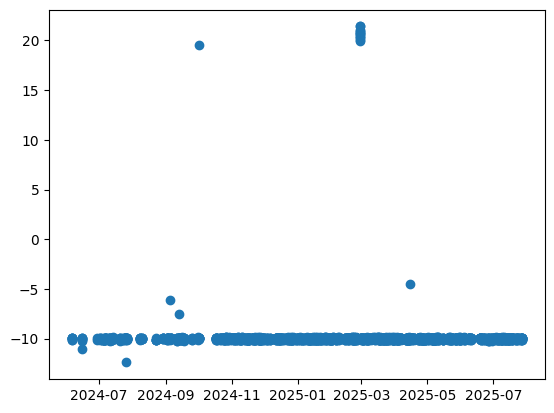

In [8]:
plt.scatter(data["DATE-OBS"], data["CCD-TEMP"])

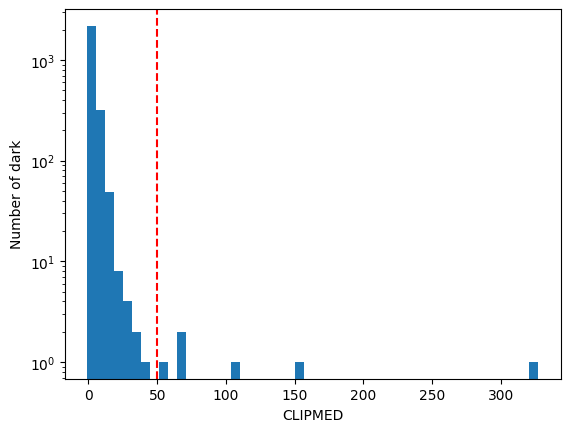

In [171]:
plt.hist(data["CLIPMED"], bins=50)

plt.yscale("log")
plt.axvline(50, color="r", linestyle="--")
plt.xlabel("CLIPMED")
plt.ylabel("Number of dark")
plt.show()

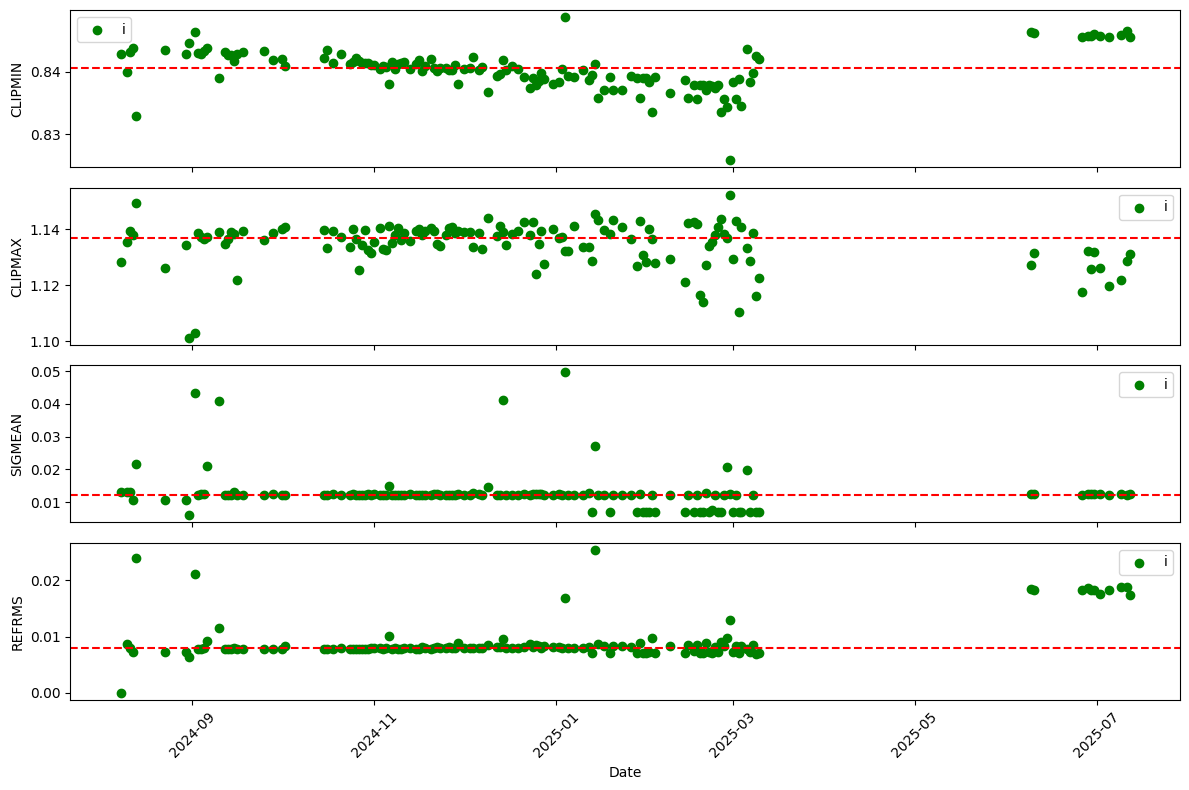

In [117]:
plot_pars(data, tel="7DT03", input_filt="i")

/tmp/ipykernel_3496854/251548813.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  new_data = np.array(subdata[par][1:])/np.array(subdata[par][:-1])
/tmp/ipykernel_3496854/251548813.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax1.plot(subdata['DATE-OBS'][1:], new_data, label=filt, marker="o")


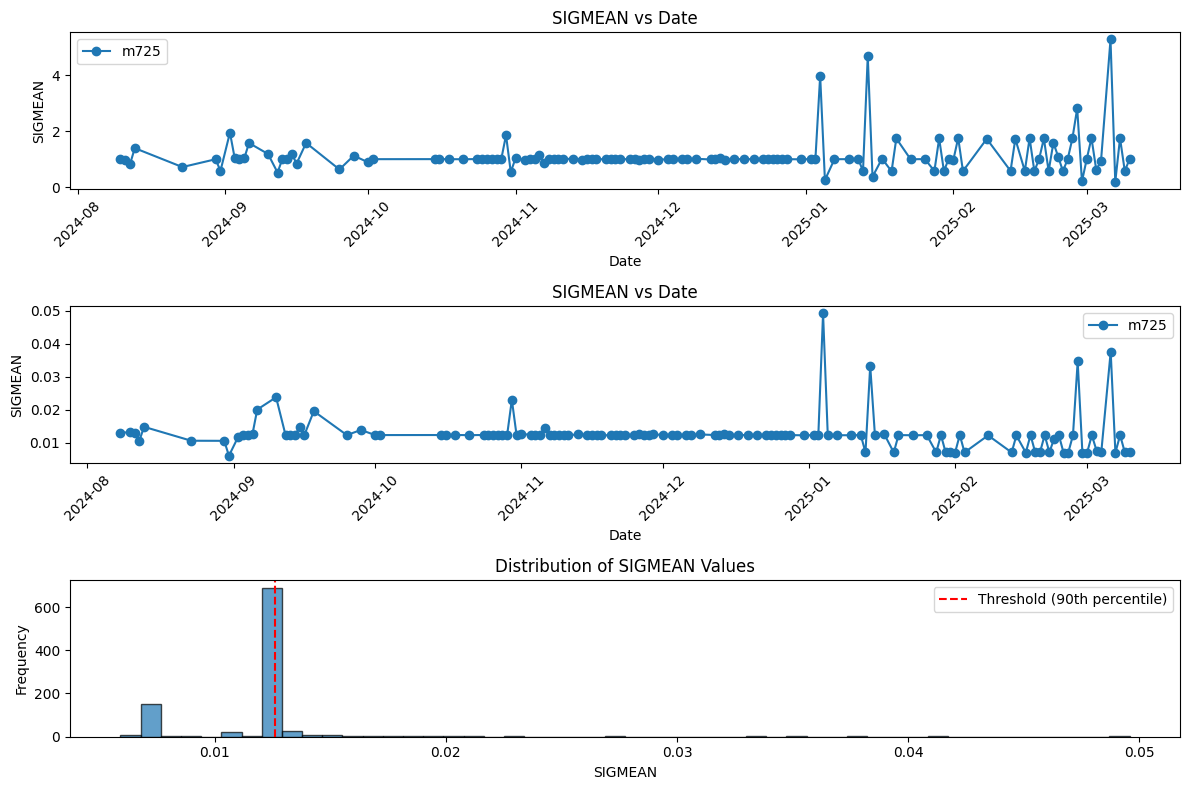

In [127]:
plot_par(data, "SIGMEAN", tel="7DT03", filt="m725")

In [34]:
from astropy.io import fits

with fits.open("/lyman/data2/master_frame/2025-07-24/7DT11/dark_100s_7DT11_20250725_1x1_gain2750_C31232.fits") as hdul:
    header = hdul[0].header
    

In [36]:
header["NAXIS1"]*header["NAXIS2"]

61171488

In [40]:
sum(data["NHOTPIX"]/61171488*100 > 2)

1

In [31]:
np.percentile(data["NHOTPIX"], 95)

415885.15

In [62]:
from astropy.time import Time

In [65]:
data[(data["NDELTA"] > 9.7)]["DATE-OBS"]

598     2024-11-21T00:00:00.000
607     2024-11-22T00:00:00.000
618     2024-11-23T00:00:00.000
639     2024-11-25T00:00:00.000
642     2024-11-26T00:00:00.000
                 ...           
2252    2025-06-09T00:00:00.000
2253    2025-06-09T00:00:00.000
2255    2025-06-09T00:00:00.000
2256    2025-06-09T00:00:00.000
2258    2025-06-09T00:00:00.000
Name: DATE-OBS, Length: 130, dtype: object

In [ ]:
data[(data["NDELTA"] < 3)]["TELESCOP"].value_counts()

7DT08    213
7DT07    209
7DT05    184
7DT09    165
7DT02    162
7DT03    153
7DT15    138
7DT10    117
7DT04    112
7DT13     90
7DT12     71
7DT16     66
7DT01     52
7DT06     27
7DT11     16
Name: TELESCOP, dtype: int64

In [92]:
data[(data["NDELTA"] < 6)]["TELESCOP"].value_counts()

7DT08    213
7DT07    211
7DT10    200
7DT05    186
7DT09    178
7DT04    163
7DT02    162
7DT03    154
7DT15    139
7DT12    130
7DT11    125
7DT13     90
7DT16     88
7DT06     59
7DT01     53
Name: TELESCOP, dtype: int64

In [ ]:
subdata = data[(data["NDELTA"] < 3)]

In [76]:
subdata = data[(data["NDELTA"] < 3)]


In [ ]:
s[:-2

NameError: name 's' is not defined

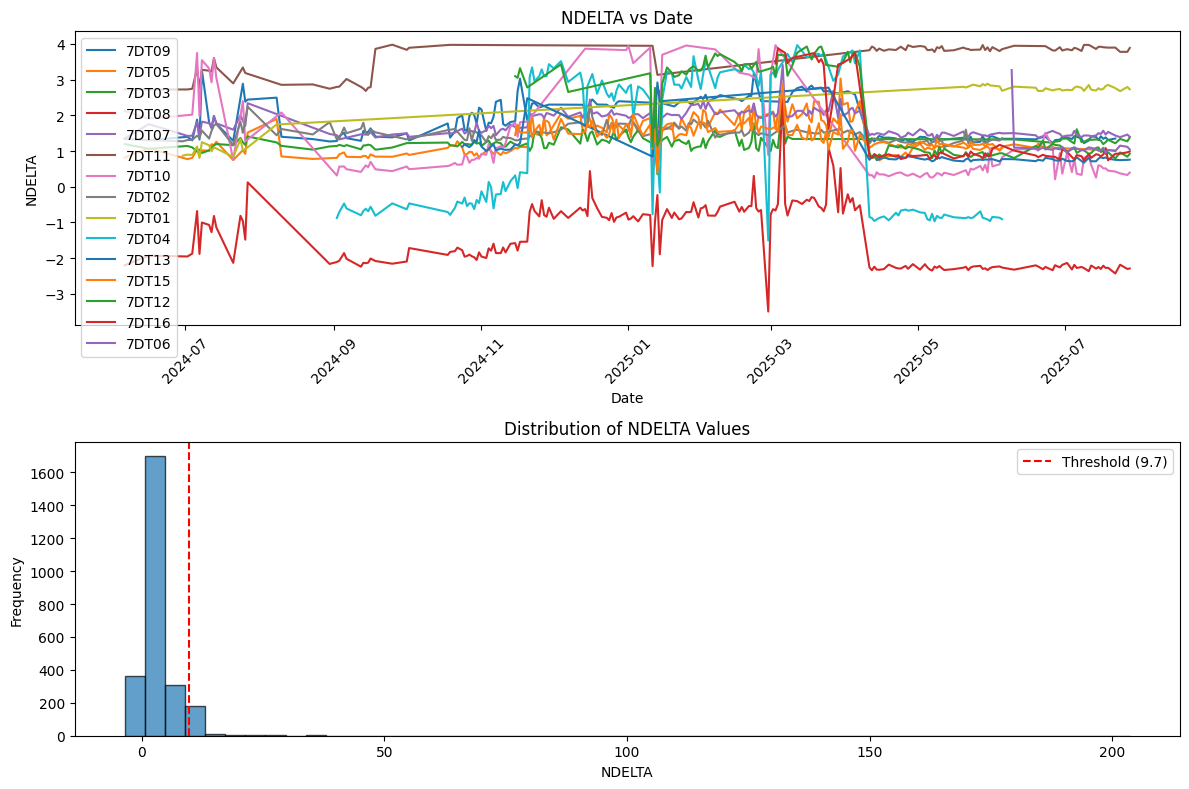

In [97]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Convert DATE-OBS to datetime if not already
data['DATE-OBS'] = pd.to_datetime(data['DATE-OBS'])

color = [float(s[-2:]) for s in subdata['TELESCOP']]

# Plot 1: Date vs NDELTA
for tel in subdata['TELESCOP'].unique():
    ax1.plot(subdata[subdata['TELESCOP'] == tel]['DATE-OBS'], subdata[subdata['TELESCOP'] == tel]['NDELTA'], label=tel)
ax1.set_xlabel('Date')
ax1.set_ylabel('NDELTA')
ax1.set_title('NDELTA vs Date')
ax1.tick_params(axis='x', rotation=45)
ax1.legend()

# Plot 2: Histogram of NDELTA values
ax2.hist(data['NDELTA'], bins=50, alpha=0.7, edgecolor='black')
ax2.set_xlabel('NDELTA')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of NDELTA Values')
ax2.axvline(9.7, color='red', linestyle='--', label='Threshold (9.7)')
ax2.legend()

plt.tight_layout()
plt.show()

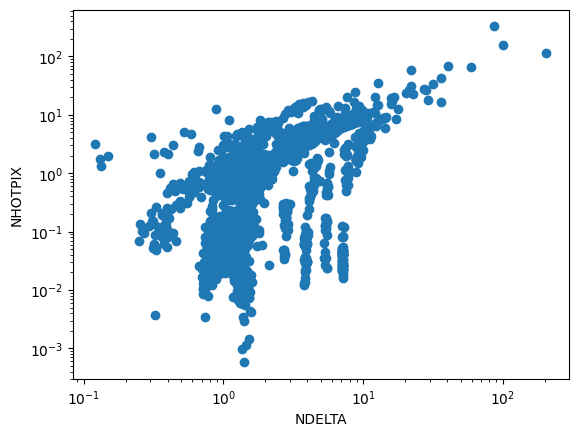

In [19]:
plt.scatter(data["NDELTA"], data["CLIPMEAN"])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("NDELTA")
plt.ylabel("NHOTPIX")
plt.show()

In [ ]:
sum((data["CLIPSTD"]<514) * (data["CLIPSTD"]>512))

3272

In [1]:
sum(data["CLIPSTD"]<2.5)

NameError: name 'data' is not defined

In [14]:
min(data["CLIPMEAN"]), max(data["CLIPMEAN"])

(511.981689453125, 514.1821899414062)

In [4]:
from matplotlib import pyplot as plt

In [6]:
min(data["CLIPMEAN"])

-0.5179958343505859

In [8]:
import numpy as np

In [12]:
len(data)

2578

In [21]:
np.percentile(data["CLIPMEAN"], 95)

9.42011003494263

In [13]:
sum(data["CLIPMEAN"]<3)

1889

In [17]:
import matplotlib.pyplot as plt
import numpy as np

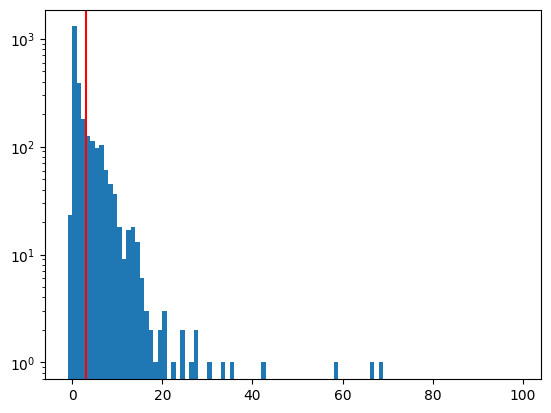

In [19]:
plt.hist(data["CLIPMEAN"], np.arange(-1, 100, 1 ))
plt.yscale("log")
plt.axvline(3, color="red")

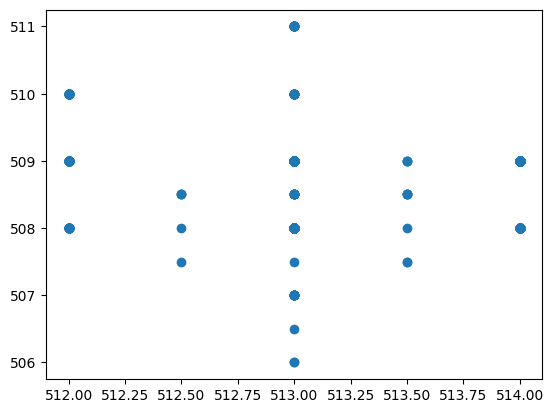

In [19]:
plt.scatter(data["CLIPMED"], data["CLIPMIN"])

In [14]:
import numpy as np

In [18]:
min(data["CLIPMEAN"])

511.981689453125

(array([  91.,    0.,    0.,   68.,  390., 1243., 1463.,   24.,    5.,
           7.]),
 array([0.80963236, 0.97115739, 1.13268242, 1.29420745, 1.45573248,
        1.61725751, 1.77878253, 1.94030756, 2.10183259, 2.26335762,
        2.42488265]),
 <BarContainer object of 10 artists>)

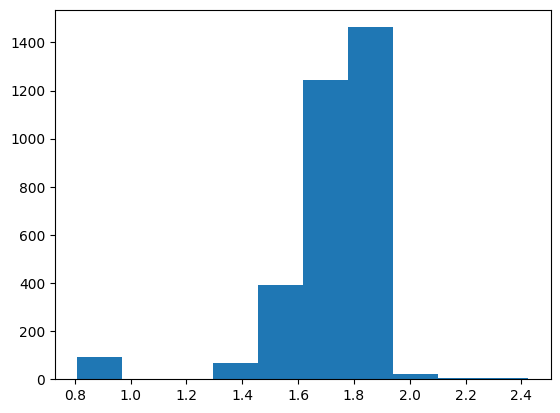

In [ ]:
plt.hist(data["CLIPSTD"])

(array([ 146.,    0.,    5.,    0.,    0., 2915.,    0.,   10.,    0.,
         215.]),
 array([512. , 512.2, 512.4, 512.6, 512.8, 513. , 513.2, 513.4, 513.6,
        513.8, 514. ]),
 <BarContainer object of 10 artists>)

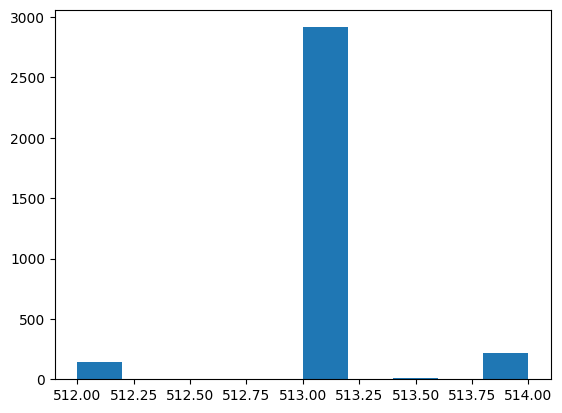

In [10]:
plt.hist(data["CLIPMED"])